In [1]:
!pip install scipy==1.8.0

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import product
import statistics
import numpy as np
import math
import collections
import scipy

In [4]:
def create_random_graph(n=100, p=0.04):
    return nx.erdos_renyi_graph(n, p)


def create_small_world_ws_graph(n=100, p=0.5, m=4):
    return nx.watts_strogatz_graph(n, m, p)


def create_small_world_nws_graph(n=100, p=0.5, k=4):
    return nx.newman_watts_strogatz_graph(n, k, p)


def create_small_world_ring_graph(n=100, d=4):
    return nx.random_regular_graph(d, n)


def create_agave_graph(n=100, steps=1):
    G = nx.Graph()
    G.add_nodes_from([x for x in range(n)])
    if steps < 0:
        steps = 0
    elif steps >= n:
        steps = n-1;
    for i in range(steps+1):
        for j in range(i+1, n):
            G.add_edge(i,j)
    return G


def create_scale_free_graph(n=100, alpha=0.41, beta=0.54, gamma=0.05, delta_in=0.2, delta_out=0):
    directed_graph = nx.scale_free_graph(n, alpha, beta, gamma, delta_in, delta_out)
    undirected_graph = directed_graph.to_undirected()
    # remove self-loops
    undirected_graph.remove_edges_from(nx.selfloop_edges(undirected_graph))
    return undirected_graph

def create_apollonian_graph(steps=2):
    G = nx.Graph()
    G.add_nodes_from([1, 2, 3])
    G.add_edges_from([(1, 2), (2, 3), (1, 3)])
    last_node = 3
    triangles_queue = [[1, 2, 3]]
    new_triangles = []
    shells = [[1, 2, 3]]
    for step in range(steps):
        new_shell = []
        while triangles_queue:
            current_triangle = triangles_queue.pop()
            last_node += 1
            G.add_node(last_node)
            # for triangle_node in current_triangle:
            # add edges between new node and current triangle
            G.add_edge(last_node, current_triangle[0])
            G.add_edge(last_node, current_triangle[1])
            G.add_edge(last_node, current_triangle[2])
            # insert new triangles in new_triangles list
            new_triangles.append([current_triangle[0], current_triangle[1], last_node])
            new_triangles.append([current_triangle[1], current_triangle[2], last_node])
            new_triangles.append([current_triangle[2], current_triangle[0], last_node])
            # add new node to new shell
            new_shell.append(last_node)
        triangles_queue = new_triangles
        new_triangles = []
        shells.insert(0, new_shell)
    shells[0], shells[1] = shells[1], shells[0]
    return G, shells

In [ ]:
def draw_network(G, position):
    d = dict(G.degree)
    nx.draw_networkx(G, with_labels=False, pos=position, nodelist=d.keys(), node_size=[v * 20 for v in d.values()])
    plt.figure()

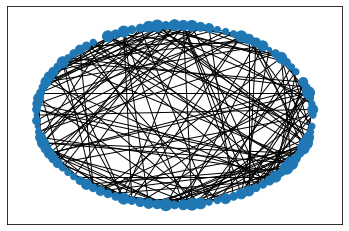

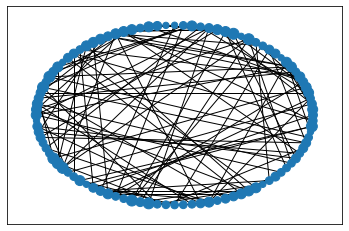

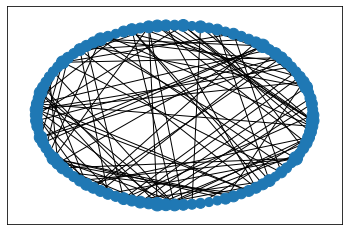

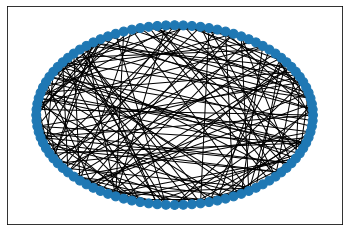

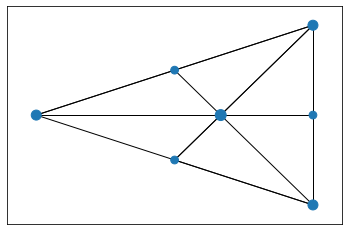

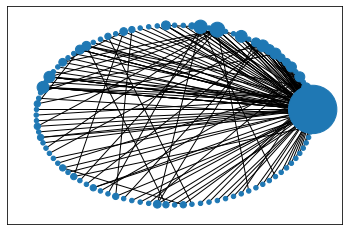

<Figure size 432x288 with 0 Axes>

In [ ]:
R = create_random_graph()
print('Random network:')
draw_network(R, nx.circular_layout(R))

SW_WS = create_small_world_ws_graph()
print('Small World (Watts-Strogatz model) network:')
draw_network(SW_WS, nx.circular_layout(SW_WS))

SW_NWS = create_small_world_nws_graph()
print('Small World (Newman model) network:')
draw_network(SW_NWS, nx.circular_layout(SW_NWS))

G_agave = create_agave_graph()

SW_ring = create_small_world_ring_graph()
print('Small World (Ring model) network:')
draw_network(SW_ring, nx.circular_layout(SW_ring))

apollonian, shells = create_apollonian_graph()
print('Apollonian network:')
draw_network(apollonian, nx.shell_layout(apollonian, shells))

SF = create_scale_free_graph()
print('Scale-Free network:')
draw_network(SF, nx.circular_layout(SF))

# ⟨d⟩ ≈ ln N / ln ⟨k⟩

In [3]:
def get_average_path_length(G):
    connected_components = (G.subgraph(c) for c in nx.connected_components(G))
    average_paths = []
    for component in connected_components:
        average_paths.append(nx.average_shortest_path_length(component))
    return statistics.mean(average_paths)

In [4]:
def calculate_average_path_analytic(G):
    n = G.number_of_nodes()
    k_mean = 2*G.number_of_edges() / float(G.number_of_nodes())
    return (math.log(n) / math.log(k_mean))

In [ ]:
NUM_OF_GRAPHS = 5
ns = [x for x in range(100, 200, 10)]
d_means_simulation = []
d_means_analytic = []
for n in ns:
    sum_d_simulation = 0
    sum_d_analytic = 0
    for i in range(NUM_OF_GRAPHS):
        G = create_small_world_ws_graph(n)
        d_mean_simulation = get_average_path_length(G)
        d_mean_analytic = calculate_average_path_analytic(G)
        sum_d_simulation += d_mean_simulation
        sum_d_analytic += d_mean_analytic
    d_means_simulation.append(sum_d_simulation/NUM_OF_GRAPHS)
    d_means_analytic.append(sum_d_analytic/NUM_OF_GRAPHS)

Text(0.5, 0, 'N')

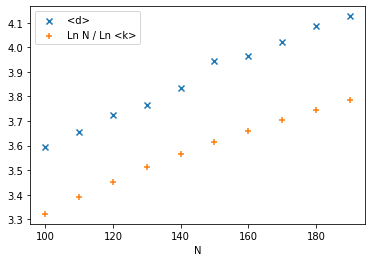

In [ ]:
plt.scatter(ns, d_means_simulation, label="<d>", marker='x')
plt.scatter(ns, d_means_analytic, label="Ln N / Ln <k>", marker='+')
plt.legend()
plt.xlabel('N')

# Average path in different networks

In [ ]:
ns = [x for x in range(10, 500, 50)]
d_means_random = []
d_means_lattice_1d = []
d_means_lattice_2d = []
d_means_lattice_3d = []

for n in ns:
    print(n)
    sum_d_random = 0
    sum_d_lattice_1d = 0
    sum_d_lattice_2d = 0
    sum_d_lattice_3d = 0
    for i in range(NUM_OF_GRAPHS):
        G = create_random_graph(n, 0.04)
        d_mean_random = get_average_path_length(G)
        sum_d_random += d_mean_random

        G = nx.grid_graph([n])
        d_mean_lattice_1d = get_average_path_length(G)
        sum_d_lattice_1d += d_mean_lattice_1d
        
        G = nx.grid_graph([int(math.sqrt(n)), int(math.sqrt(n))])
        d_mean_lattice_2d = get_average_path_length(G)
        sum_d_lattice_2d += d_mean_lattice_2d
        
        G = nx.grid_graph([int(n ** (1. / 3)), int(n ** (1. / 3)), int(n ** (1. / 3))])
        d_mean_lattice_3d = get_average_path_length(G)
        sum_d_lattice_3d += d_mean_lattice_3d

    d_means_random.append(sum_d_random/NUM_OF_GRAPHS)
    d_means_lattice_1d.append(sum_d_lattice_1d/NUM_OF_GRAPHS)
    d_means_lattice_2d.append(sum_d_lattice_2d/NUM_OF_GRAPHS)
    d_means_lattice_3d.append(sum_d_lattice_3d/NUM_OF_GRAPHS)

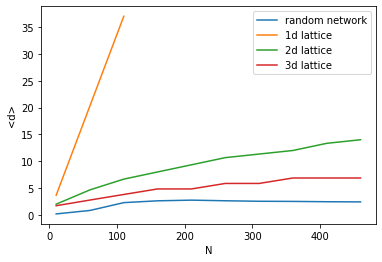

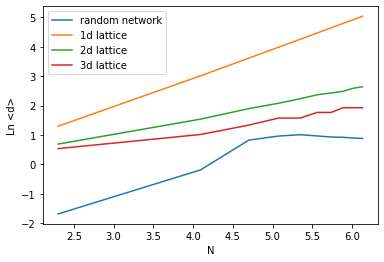

In [ ]:
# ns = [x for x in range(10, 800, 200)]
plt.plot(ns, d_means_random, label="random network")
plt.plot(ns[:3], d_means_lattice_1d[:3], label="1d lattice")
plt.plot(ns, d_means_lattice_2d, label="2d lattice")
plt.plot(ns, d_means_lattice_3d, label="3d lattice")
plt.xlabel('N')
plt.ylabel('<d>')
plt.legend()
ln_ns = [math.log(n) for n in ns]
ln_d_means_random = [math.log(d) for d in d_means_random]
ln_d_means_lattice_1d = [math.log(d) for d in d_means_lattice_1d]
ln_d_means_lattice_2d = [math.log(d) for d in d_means_lattice_2d]
ln_d_means_lattice_3d = [math.log(d) for d in d_means_lattice_3d]
plt.figure()
plt.plot(ln_ns, ln_d_means_random, label="random network")
plt.plot(ln_ns, ln_d_means_lattice_1d, label="1d lattice")
plt.plot(ln_ns, ln_d_means_lattice_2d, label="2d lattice")
plt.plot(ln_ns, ln_d_means_lattice_3d, label="3d lattice")
plt.xlabel('N')
plt.ylabel('Ln <d>')
plt.legend()

# Probability of each path length in network

In [ ]:
def find_approx_value(x_array, y_array, x_value):
    index = min(range(len(x_array)), key=lambda i: abs(x_array[i]-x_value))
    x_value1 = x_array[index]
    y_value1 = y_array[index]
    x_value2 = 0
    y_value2 = 0
    if x_value > x_value1:
        x_value2 = x_array[index+1]
        y_value2 = y_array[index+1]
    else:
        x_value2 = x_array[index-1]
        y_value2 = y_array[index-1]
    m = (y_value1 - y_value2) / (x_value1 - x_value2)
    b = y_value1 - (m * x_value1)
    return (m * x_value) + b

In [ ]:
NUM_OF_GRAPHS = 5
sw_ws_path_lengths = {}
sw_nws_path_lengths = {}
r_path_lengths = {}
sf_path_lengths = {}
n=100
for i in range(n):
    sw_ws_path_lengths[i] = 0
    sw_nws_path_lengths[i] = 0
    r_path_lengths[i] = 0
    sf_path_lengths[i] = 0
for i in range(NUM_OF_GRAPHS):
    sw_ws_G = create_small_world_ws_graph(n)
    sw_nws_G = create_small_world_nws_graph(n)
    r_G = create_random_graph(n)
    sf_G = create_scale_free_graph(n)
    sw_ws_shortest_paths = dict(nx.shortest_path_length(sw_ws_G))
    sw_nws_shortest_paths = dict(nx.shortest_path_length(sw_nws_G))
    r_shortest_paths = dict(nx.shortest_path_length(r_G))
    sf_shortest_paths = dict(nx.shortest_path_length(sf_G))
    for j in range(n):
        sw_ws_path_lengths[j] += sum(sum(1 for v in x.values() if v == j) for x in sw_ws_shortest_paths.values())
        sw_nws_path_lengths[j] += sum(sum(1 for v in x.values() if v == j) for x in sw_nws_shortest_paths.values())
        r_path_lengths[j] += sum(sum(1 for v in x.values() if v == j) for x in r_shortest_paths.values())
        sf_path_lengths[j] += sum(sum(1 for v in x.values() if v == j) for x in sf_shortest_paths.values())

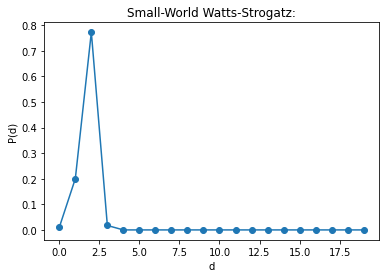

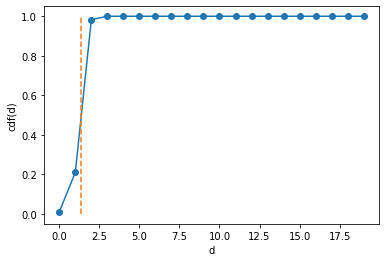

1.375355940978514 




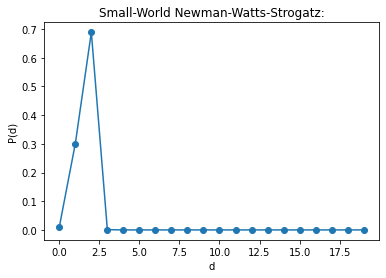

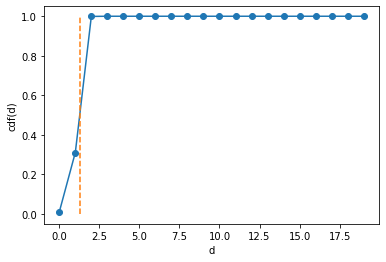

1.2752091078066914 




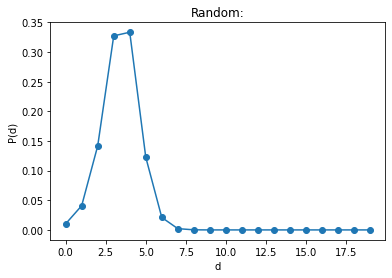

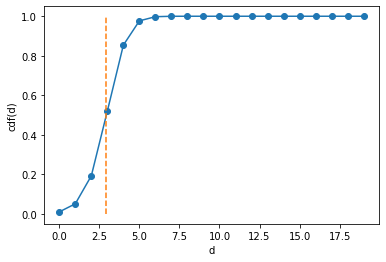

2.937633463132772 




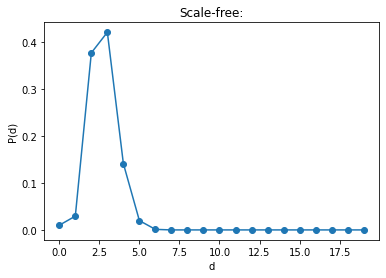

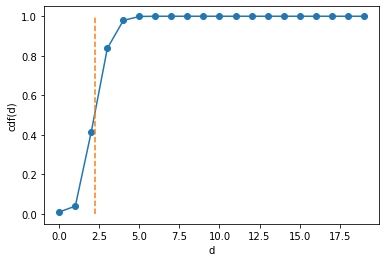

2.1980245037515433


In [ ]:
values = list(sw_ws_path_lengths.values())[:20]
sw_ws_path_length_values = [x/sum(values) for x in values]
plt.plot(list(sw_ws_path_lengths.keys())[:20], sw_ws_path_length_values, marker='o')
plt.xlabel('d')
plt.ylabel('P(d)')
plt.title('Small-World Watts-Strogatz:')
plt.figure()

cdf = np.cumsum(sw_ws_path_length_values)
plt.plot(list(sw_ws_path_lengths.keys())[:20], cdf, marker='o')
d_mean = find_approx_value(cdf, list(sw_ws_path_lengths.keys())[:20], 0.5)
plt.plot([d_mean, d_mean], [0, 1], '--')
plt.xlabel('d')
plt.ylabel('cdf(d)')
plt.show()
print(d_mean, "\n\n")


values = list(sw_nws_path_lengths.values())[:20]
sw_nws_path_length_values = [x/sum(values) for x in values]
plt.plot(list(sw_nws_path_lengths.keys())[:20], sw_nws_path_length_values, marker='o')
plt.xlabel('d')
plt.ylabel('P(d)')
plt.title('Small-World Newman-Watts-Strogatz:')
plt.figure()

cdf = np.cumsum(sw_nws_path_length_values)
plt.plot(list(sw_nws_path_lengths.keys())[:20], cdf, marker='o')
d_mean = find_approx_value(cdf, list(sw_nws_path_lengths.keys())[:20], 0.5)
plt.plot([d_mean, d_mean], [0, 1], '--')
plt.xlabel('d')
plt.ylabel('cdf(d)')
plt.show()
print(d_mean, "\n\n")


values = list(r_path_lengths.values())[:20]
r_path_length_values = [x/sum(values) for x in values]
plt.plot(list(r_path_lengths.keys())[:20], r_path_length_values, marker='o')
plt.xlabel('d')
plt.ylabel('P(d)')
plt.title('Random:')
plt.figure()

cdf = np.cumsum(r_path_length_values)
plt.plot(list(r_path_lengths.keys())[:20], cdf, marker='o')
d_mean = find_approx_value(cdf, list(r_path_lengths.keys())[:20], 0.5)
plt.plot([d_mean, d_mean], [0, 1], '--')
plt.xlabel('d')
plt.ylabel('cdf(d)')
plt.show()
print(d_mean, "\n\n")


values = list(sf_path_lengths.values())[:20]
sf_path_length_values = [x/sum(values) for x in values]
plt.plot(list(sf_path_lengths.keys())[:20], sf_path_length_values, marker='o')
plt.xlabel('d')
plt.ylabel('P(d)')
plt.title('Scale-free:')
plt.figure()

cdf = np.cumsum(sf_path_length_values)
plt.plot(list(sf_path_lengths.keys())[:20], cdf, marker='o')
d_mean = find_approx_value(cdf, list(sf_path_lengths.keys())[:20], 0.5)
plt.plot([d_mean, d_mean], [0, 1], '--')
plt.xlabel('d')
plt.ylabel('cdf(d)')
plt.show()
print(d_mean)

# Main functions

In [164]:
# Rn is the number of available paths from i_0 to i_n with distinct nodes
def calculate_Rn(n, adjacency_matrix, i_0, i_n):
    # indices = [range(len(adjacency_matrix)) for x in range(n-1)]
    s = 0
    if n == 2:
        for a in range(len(adjacency_matrix)):
            if adjacency_matrix[i_0][a] and adjacency_matrix[a][i_n]:
                s += 1
    if n == 3:
        for a in range(len(adjacency_matrix)):
            for b in range(a+1, len(adjacency_matrix)):
                if adjacency_matrix[i_0][a] and adjacency_matrix[a][b] and adjacency_matrix[b][i_n]:
                    s += 1
    elif n == 4:
        for a in range(len(adjacency_matrix)):
            for b in range(a+1, len(adjacency_matrix)):
                for c in range(b+1, len(adjacency_matrix)):
                    if adjacency_matrix[i_0][a] and adjacency_matrix[a][b] and adjacency_matrix[b][c] and adjacency_matrix[c][i_n]:
                        s += 1
    elif n == 5:
        for a in range(len(adjacency_matrix)):
            for b in range(a+1, len(adjacency_matrix)):
                for c in range(b+1, len(adjacency_matrix)):
                    for d in range(c+1, len(adjacency_matrix)):
                        if adjacency_matrix[i_0][a] and adjacency_matrix[a][b] and adjacency_matrix[b][c] and adjacency_matrix[c][d] and adjacency_matrix[d][i_n]:
                            s += 1
    elif n == 6:
        for a in range(len(adjacency_matrix)):
            for b in range(a+1, len(adjacency_matrix)):
                for c in range(b+1, len(adjacency_matrix)):
                    for d in range(c+1, len(adjacency_matrix)):
                        for e in range(d+1, len(adjacency_matrix)):
                            if adjacency_matrix[i_0][a] and adjacency_matrix[a][b] and adjacency_matrix[b][c] and adjacency_matrix[c][d] and adjacency_matrix[d][e] and adjacency_matrix[e][i_n]:
                                s += 1

    # for index in product(*indices):
    #     l_index = list(index)
    #     first_half = [i_0] + l_index
    #     second_half = l_index + [i_n]
    #     if len(set(first_half)) != len(first_half) or len(set(second_half)) != len(second_half):
    #         continue
    #     i = [i_0] + list(index) + [i_n]
    #     mult = 1
    #     for k in range(n):
    #         if adjacency_matrix[i[k]][i[k+1]] == 0:
    #             mult = 0
    #             break
    #     s += mult
    return s

In [6]:
# rn is the ratio of the number of the nonzero elements among all elements in (adjacency_matrix)^n
def calculate_rn(n, adjacency_matrix):
    np_matrix = np.array(adjacency_matrix)
    matrix_power = np.linalg.matrix_power(np_matrix, n)
    rn = np.count_nonzero(matrix_power) / (len(adjacency_matrix)**2)
    return rn


# sum of rn from 1 to q
def calculate_tq(q, adjacency_matrix):
    tq = 0
    for n in range(1, q + 1):
        tq += calculate_rn(n, adjacency_matrix)
    return tq

In [7]:
def calculate_Sq(G, q):
    adjacency_matrix = nx.adjacency_matrix(G).toarray()
    sum_numerator = 0
    sum_denominator = 0
    for i in range(len(adjacency_matrix)):
        for j in range(i, len(adjacency_matrix)):
            if i == j:
                sum_numerator += calculate_Rn(q, adjacency_matrix, i, i)
            else:
                sum_denominator += calculate_Rn(q-1, adjacency_matrix, i, j)
    return sum_numerator, sum_denominator

# Hamming Coefficient

In [19]:
from scipy.spatial import distance
def calculate_hamming_coeff(G):
    adjacency_matrix = nx.adjacency_matrix(G).toarray()
    hsum = 0
    n = len(adjacency_matrix)
    for i in range(n):
        for j in range(i+1, n):
            hsum += sum([adjacency_matrix[i][x]*adjacency_matrix[j][x] for x in range(n)])
            # for x in range(n):
            #     hsum += adjacency_matrix[i][x]*adjacency_matrix[j][x]
            # sumh += sum(a * b for a,b in zip(adjacency_matrix[i], adjacency_matrix[j]))
            # sumh += distance.hamming(adjacency_matrix[i], adjacency_matrix[j]) * G.number_of_nodes()
    h = hsum * 2 / (n * (n-1))
    return h

In [148]:
distance.hamming([1,1,0,0], [1,1,1,1])

0.5

# effect of rewiring coefficient on Small-World networks

In [20]:
NUM_OF_GRAPHS = 20
# p here is rewiring coefficient
ps = np.logspace(-4, 0, 20, endpoint = True, base=10)
# cs = [] # average clustering coefficients
# ds = [] # average path lengths
# ccs = [] # average global clustering coefficients (transivity)
hs = [] # average hamming coefficients
n=50
delta = 6
# c0 = nx.average_clustering(create_small_world_ws_graph(n,0))
# d0 = get_average_path_length(create_small_world_ws_graph(n,0))
for p in ps:
    # c_sum = 0
    # d_sum = 0
    # cc_sum = 0
    h_sum = 0
    for i in range(NUM_OF_GRAPHS):
        G = create_small_world_ws_graph(n,p)
        # G = create_random_graph(n,p)
        # c_sum += nx.average_clustering(G)
        # d_sum += get_average_path_length(G)
        h_sum += calculate_hamming_coeff(G)
        # sum_numerator, sum_denominator = calculate_Sq(G, 3)
        # cc_sum += sum_numerator/(sum_denominator*2)
    # cs.append((c_sum/NUM_OF_GRAPHS)/c0)
    # ds.append((d_sum/NUM_OF_GRAPHS)/d0)
    # ccs.append(cc_sum/NUM_OF_GRAPHS)
    hs.append(h_sum/NUM_OF_GRAPHS)

C:\Users\WebVajhegan\AppData\Local\Temp\ipykernel_2064\2200221337.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjacency_matrix = nx.adjacency_matrix(G).toarray()


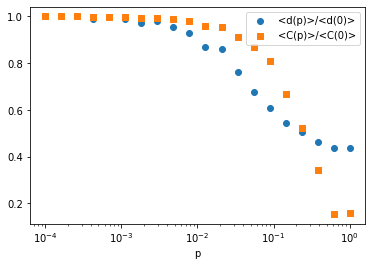

In [28]:
plt.scatter(ps, ds, label="<d(p)>/<d(0)>", marker='o')
plt.scatter(ps, cs, label="<C(p)>/<C(0)>", marker='s')
plt.xlabel('p')
plt.xscale('log')
plt.legend()

In [36]:
am = nx.adjacency_matrix(G).toarray()
print (am)
matrix = np.array(am)
print(np.linalg.det(matrix))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
-308.0000000000007


C:\Users\WebVajhegan\AppData\Local\Temp\ipykernel_2064\3058469827.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  am = nx.adjacency_matrix(G).toarray()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


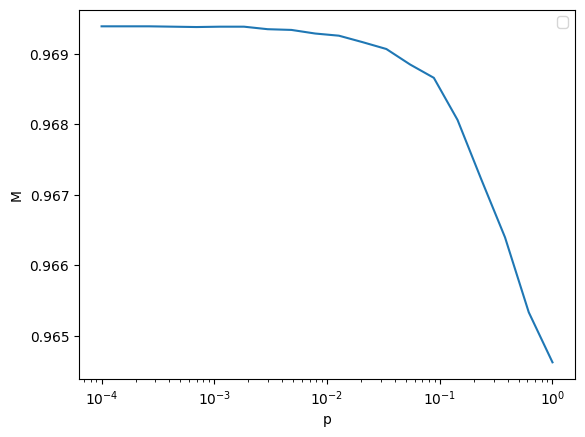

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


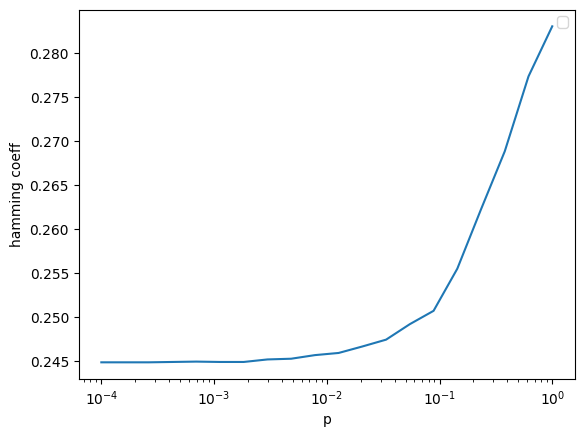

In [21]:
ps = np.logspace(-4, 0, 20, endpoint = True, base=10)
plt.plot(ps, 1-(np.array(hs)*(1/8)))
plt.xlabel('p')
plt.ylabel('M')
plt.xscale('log')
plt.legend()
plt.show()
plt.plot(ps, hs)
plt.xlabel('p')
plt.ylabel('hamming coeff')
plt.xscale('log')
plt.legend()

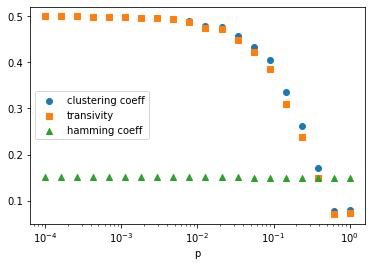

In [32]:
plt.scatter(ps, (c0 * np.array(cs)).tolist(), label="clustering coeff", marker='o')
plt.scatter(ps, ccs, label="transivity", marker='s')
plt.scatter(ps, hs, label="hamming coeff", marker='^')
plt.xlabel('p')
plt.xscale('log')
plt.legend()

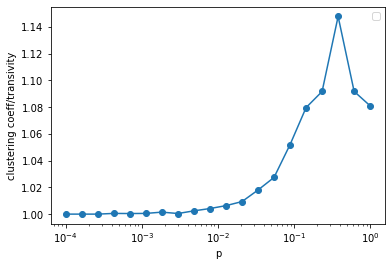

In [43]:
plt.plot(ps, (c0 * np.array(cs)/np.array(ccs)).tolist(), marker='o')
plt.xlabel('p')
plt.ylabel('clustering coeff/transivity')
plt.xscale('log')
plt.legend()

# Normalized X(p)

In [9]:
ns = [3,4,5,6]
ps = np.logspace(-3, 0, 10, endpoint = True, base=10)
NUM_OF_NODES = 50
NUM_OF_GRAPHS = 5
ws_final_clustering_coefficients = []
# nws_final_clustering_coefficients = []

for n in ns:
    print('n:', n)
    ws_mean_clustering_coefficients = []
    # nws_mean_clustering_coefficients = []
    for p in ps:
        print('\tp:', p)
        ws_raw_clustering_coefficients = []
        nws_raw_clustering_coefficients = []
        for x in range(NUM_OF_GRAPHS):
            ws_G = create_small_world_ws_graph(NUM_OF_NODES, p)
            # nws_G = create_small_world_nws_graph(NUM_OF_NODES, p)
            ws_sum_numerator, ws_sum_denominator = calculate_Sq(ws_G, n)
            # nws_sum_numerator, nws_sum_denominator = calculate_Sq(nws_G, n)
            ws_raw_clustering_coefficients.append(ws_sum_numerator/ws_sum_denominator)
            # nws_raw_clustering_coefficients.append(nws_sum_numerator/(nws_sum_denominator*2))
        ws_mean_clustering_coefficients.append(statistics.mean(ws_raw_clustering_coefficients))
        # nws_mean_clustering_coefficients.append(statistics.mean(nws_raw_clustering_coefficients))
    ws_final_clustering_coefficients.append(ws_mean_clustering_coefficients)
    # nws_final_clustering_coefficients.append(nws_mean_clustering_coefficients)
ws_X3 = ws_final_clustering_coefficients[0]
# nws_X3 = ws_final_clustering_coefficients[0]
ws_X4 = list(np.add(ws_X3, ws_final_clustering_coefficients[1]))
# nws_X4 = list(np.add(nws_X3, ws_final_clustering_coefficients[1]))
ws_X5 = list(np.add(ws_X4, ws_final_clustering_coefficients[1]))
# nws_X5 = list(np.add(nws_X3, ws_final_clustering_coefficients[1]))
ws_X6 = list(np.add(ws_X5, ws_final_clustering_coefficients[1]))
# nws_X6 = list(np.add(nws_X3, ws_final_clustering_coefficients[1]))

n: 3
	p: 0.001
	p: 0.0021544346900318843


C:\Users\WebVajhegan\AppData\Local\Temp\ipykernel_17600\2477168308.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjacency_matrix = nx.adjacency_matrix(G).toarray()


	p: 0.004641588833612777
	p: 0.01
	p: 0.021544346900318832
	p: 0.046415888336127774
	p: 0.1
	p: 0.21544346900318823
	p: 0.46415888336127775
	p: 1.0
n: 4
	p: 0.001
	p: 0.0021544346900318843
	p: 0.004641588833612777
	p: 0.01
	p: 0.021544346900318832
	p: 0.046415888336127774
	p: 0.1
	p: 0.21544346900318823
	p: 0.46415888336127775
	p: 1.0
n: 5
	p: 0.001
	p: 0.0021544346900318843
	p: 0.004641588833612777
	p: 0.01
	p: 0.021544346900318832
	p: 0.046415888336127774
	p: 0.1
	p: 0.21544346900318823
	p: 0.46415888336127775
	p: 1.0
n: 6
	p: 0.001
	p: 0.0021544346900318843
	p: 0.004641588833612777
	p: 0.01
	p: 0.021544346900318832
	p: 0.046415888336127774
	p: 0.1
	p: 0.21544346900318823
	p: 0.46415888336127775
	p: 1.0


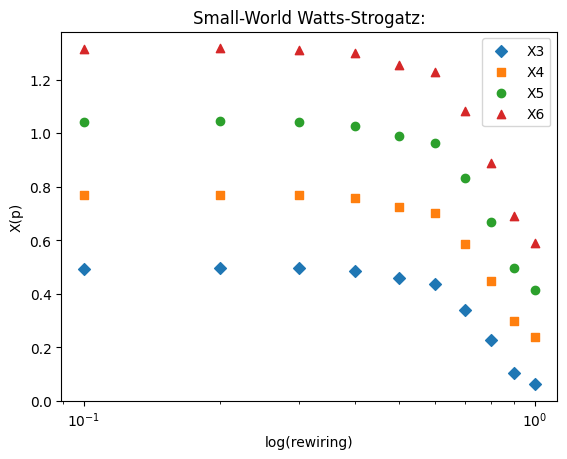

In [11]:
plt.scatter(ps, ws_X3, label="X3", marker='D')
plt.scatter(ps, ws_X4, label="X4", marker='s')
plt.scatter(ps, ws_X5, label="X5", marker='o')
plt.scatter(ps, ws_X6, label="X6", marker='^')
plt.legend()
plt.xlabel('log(rewiring)')
plt.ylabel('X(p)')
plt.xscale('log')
plt.title('Small-World Watts-Strogatz:')
plt.show()

# plt.scatter(ps, nws_X3, label="X3", marker='D')
# plt.scatter(ps, nws_X4, label="X4", marker='s')
# plt.scatter(ps, nws_X4, label="X4", marker='s')
# plt.scatter(ps, nws_X4, label="X4", marker='s')
# plt.legend()
# plt.xlabel('log(rewiring)')
# plt.ylabel('X(p)')
# plt.xscale('log')
# plt.title('Newman-Small-World Watts-Strogatz:')
# plt.show()

# Milgram condition

In [10]:
ns = [3,4,5,6]
ps = [x/10 for x in range(1,11)]
NUM_OF_NODES = 50
NUM_OF_GRAPHS = 5
ws_final_clustering_coefficients2 = []
# nws_final_clustering_coefficients = []
ws_Mqs = []
nws_Mqs = []

for n in ns:
    ws_mean_clustering_coefficients = []
    # nws_mean_clustering_coefficients = []
    ws_Sq_sum = 0
    # nws_Sq_sum = 0
    ws_Mqs_alpha = []
    # nws_Mqs_alpha = []
    for p in ps:
        ws_raw_clustering_coefficients = []
        # nws_raw_clustering_coefficients = []
        for x in range(NUM_OF_GRAPHS):
            ws_G = create_small_world_ws_graph(NUM_OF_NODES, p)
            # nws_G = create_small_world_nws_graph(NUM_OF_NODES, p)
            ws_sum_numerator, ws_sum_denominator = calculate_Sq(ws_G, n)
            # nws_sum_numerator, nws_sum_denominator = calculate_Sq(nws_G, n)
            ws_raw_clustering_coefficients.append(ws_sum_numerator/(ws_sum_denominator*2))
            # nws_raw_clustering_coefficients.append(nws_sum_numerator/(nws_sum_denominator*2))
            ws_Sq_sum += ws_sum_denominator
            # nws_Sq_sum += nws_sum_denominator
        ws_mean_clustering_coefficients.append(statistics.mean(ws_raw_clustering_coefficients))
        # nws_mean_clustering_coefficients.append(statistics.mean(nws_raw_clustering_coefficients))
        ws_Sq = ws_Sq_sum / NUM_OF_GRAPHS
        # nws_Sq = nws_Sq_sum / NUM_OF_GRAPHS
        ws_Mq = ws_Sq / NUM_OF_NODES
        # nws_Mq = nws_Sq / NUM_OF_NODES
        ws_Mqs_alpha.append(ws_Mq)
        # nws_Mqs_alpha.append(nws_Mq)

    ws_final_clustering_coefficients2.append(ws_mean_clustering_coefficients)
    # nws_final_clustering_coefficients.append(nws_mean_clustering_coefficients)
    
    ws_Mqs.append(ws_Mqs_alpha)
    # nws_Mqs.append(nws_Mqs_alpha)

C:\Users\WebVajhegan\AppData\Local\Temp\ipykernel_17600\2477168308.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjacency_matrix = nx.adjacency_matrix(G).toarray()


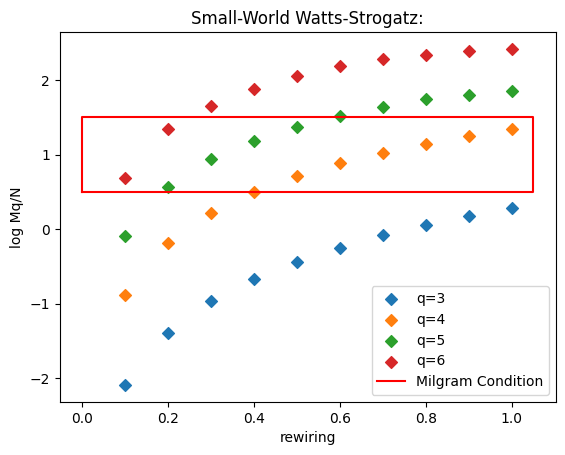

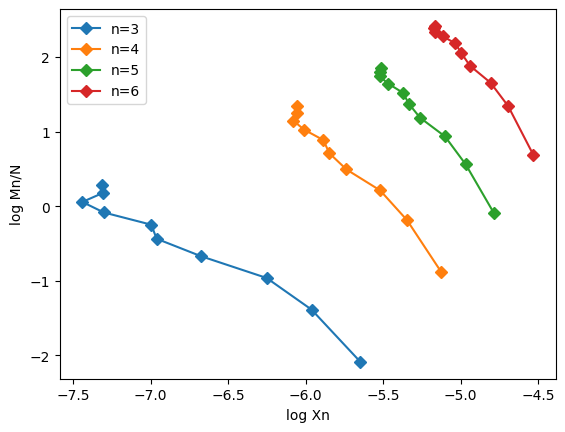

In [18]:
ws_log_Mqs = [[math.log(m/NUM_OF_NODES) for m in Mq] for Mq in ws_Mqs]
plt.scatter(ps, ws_log_Mqs[0], label="q=3", marker='D')
plt.scatter(ps, ws_log_Mqs[1], label="q=4", marker='D')
plt.scatter(ps, ws_log_Mqs[2], label="q=5", marker='D')
plt.scatter(ps, ws_log_Mqs[3], label="q=6", marker='D')
plt.plot([0,0,1.05,1.05,0], [0.5,1.5,1.5,0.5,0.5], label="Milgram Condition", color='red')
plt.xlabel('rewiring')
plt.ylabel('log Mq/N')
plt.title('Small-World Watts-Strogatz:')
plt.legend()
plt.figure()

ws2_X3 = ws_final_clustering_coefficients2[0]
ws2_X4 = list(np.add(ws2_X3, ws_final_clustering_coefficients2[1]))
ws2_X5 = list(np.add(ws2_X4, ws_final_clustering_coefficients2[1]))
ws2_X6 = list(np.add(ws2_X5, ws_final_clustering_coefficients2[1]))
ws_log_X3 = [math.log(x/NUM_OF_NODES) for x in ws2_X3]
ws_log_X4 = [math.log(x/NUM_OF_NODES) for x in ws2_X4]
ws_log_X5 = [math.log(x/NUM_OF_NODES) for x in ws2_X5]
ws_log_X6 = [math.log(x/NUM_OF_NODES) for x in ws2_X6]
plt.plot(ws_log_X3, ws_log_Mqs[0], label="n=3", marker='D')
plt.plot(ws_log_X4, ws_log_Mqs[1], label="n=4", marker='D')
plt.plot(ws_log_X5, ws_log_Mqs[2], label="n=5", marker='D')
plt.plot(ws_log_X6, ws_log_Mqs[3], label="n=6", marker='D')
plt.xlabel('log Xn')
plt.ylabel('log Mn/N')
plt.legend()
plt.show()


# nws_log_Mqs = [[math.log(m/NUM_OF_NODES) for m in Mq] for Mq in nws_Mqs]
# plt.scatter(ps, nws_log_Mqs[0], label="q=3", marker='D')
# plt.scatter(ps, nws_log_Mqs[1], label="q=4", marker='D')
# plt.plot([0,0,1,1,0], [0.5,1.5,1.5,0.5,0.5], label="Milgram Condition", color='red')
# plt.xlabel('rewiring')
# plt.ylabel('log Mq/N')
# plt.title('Small-World Newman-Watts-Strogatz:')
# plt.legend()
# plt.figure()

# nws_Xns = [nws_final_clustering_coefficients[0], list(np.add(nws_X3, nws_final_clustering_coefficients[1]))]
# nws_log_Xns = [[math.log(x/NUM_OF_NODES) for x in Xn] for Xn in nws_Xns]
# plt.plot(nws_log_Xns[0], nws_log_Mqs[0], label="n=3", marker='D')
# plt.plot(nws_log_Xns[1], nws_log_Mqs[1], label="n=4", marker='D')
# plt.xlabel('log Xn')
# plt.ylabel('log Mn/N')
# plt.legend()
# plt.show()

In [ ]:
ns = [1,2,3,4,5]
ps = [x/10 for x in range(1,11)]
Tns = []
for n in ns:
    rns = []
    for p in ps:
        rn_sum = 0
        for x in range(NUM_OF_GRAPHS):
            G = create_small_world_ws_graph(NUM_OF_NODES, p)
            rn_sum += calculate_rn(n, nx.adjacency_matrix(G).toarray())
        rn = rn_sum / NUM_OF_GRAPHS
        rns.append(rn)
    if n == 1:
        Tns.append(rns)
    else:
        Tns.append(list(np.add(Tns[n-2], rns)))

Text(0, 0.5, 'Tn')

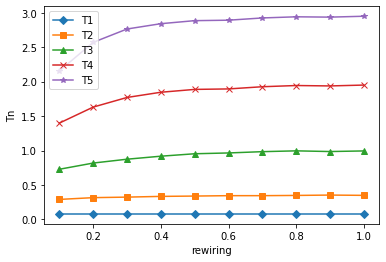

In [ ]:
plt.plot(ps, Tns[0], label="T1", marker='D')
plt.plot(ps, Tns[1], label="T2", marker='s')
plt.plot(ps, Tns[2], label="T3", marker='^')
plt.plot(ps, Tns[3], label="T4", marker='x')
plt.plot(ps, Tns[4], label="T5", marker='*')
plt.legend()
plt.xlabel('rewiring')
plt.ylabel('Tn')

In [ ]:
Ls = [] # L is average path length in network
for p in ps:
    L_sum = 0
    for x in range(NUM_OF_GRAPHS):
        G = create_small_world_ws_graph(NUM_OF_NODES, p)
        L_sum += get_average_path_length(G)
    Ls.append(L_sum/NUM_OF_GRAPHS)

Text(0, 0.5, 'average path length')

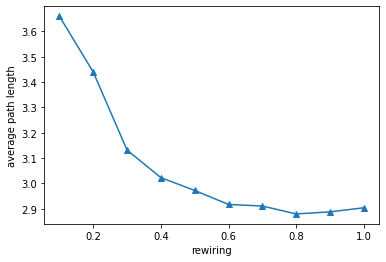

In [ ]:
plt.plot(ps, Ls, marker='^')
plt.xlabel('rewiring')
plt.ylabel('average path length')

# The effect of rewiring coefficient on C(p) in SW networks

In [ ]:
ns = [3,4]
ps = [x/10 for x in range(1,11)]
NUM_OF_NODES = 100
NUM_OF_GRAPHS = 5
final_clustering_coefficients = []

for n in ns:
    mean_clustering_coefficients = []
    for p in ps:
        raw_clustering_coefficients = []
        for x in range(NUM_OF_GRAPHS):
            G = create_small_world_ws_graph(NUM_OF_NODES, p)
            sum_numerator, sum_denominator = calculate_Sq(G, n)
            raw_clustering_coefficients.append(sum_numerator/(sum_denominator*2))
        mean_clustering_coefficients.append(statistics.mean(raw_clustering_coefficients))
    final_clustering_coefficients.append(mean_clustering_coefficients)

Text(0, 0.5, 'C(p)')

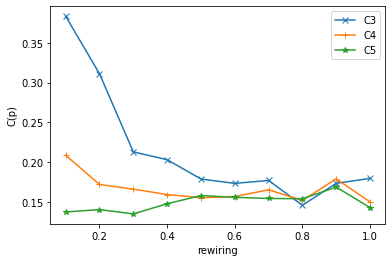

In [ ]:
plt.plot(ps, final_clustering_coefficients[0], label="C3", marker='x')
plt.plot(ps, final_clustering_coefficients[1], label="C4", marker='+')
plt.plot(ps, final_clustering_coefficients[2], label="C5", marker='*')
plt.legend()
plt.xlabel('rewiring')
plt.ylabel('C(p)')

# The effect of average degree on C(p) in SW networks

In [ ]:
NUM_OF_GRAPHS = 5
ms = [x for x in range(2, 11)]
final_clustering_coefficients = []

for n in ns:
    mean_clustering_coefficients = []
    for m in ms:
        raw_clustering_coefficients = []
        for x in range(NUM_OF_GRAPHS):
            G = create_small_world_graph(NUM_OF_NODES, 0.5, m)
            adjacency_matrix = nx.adjacency_matrix(G).toarray()
            sum_numerator = 0
            sum_denominator = 0
            for i in range(len(adjacency_matrix)):
                for j in range(i, len(adjacency_matrix)):
                    if i == j:
                        sum_numerator += calculate_Rn(n, adjacency_matrix, i, i)
                    else:
                        sum_denominator += calculate_Rn(n-1, adjacency_matrix, i, j)
            raw_clustering_coefficients.append(sum_numerator/(sum_denominator*2))
        mean_clustering_coefficients.append(statistics.mean(raw_clustering_coefficients))
    final_clustering_coefficients.append(mean_clustering_coefficients)

Text(0, 0.5, 'C(p)')

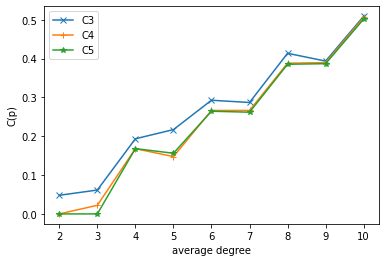

In [ ]:
plt.plot(ms, final_clustering_coefficients[0], label="C3", marker='x')
plt.plot(ms, final_clustering_coefficients[1], label="C4", marker='+')
plt.plot(ms, final_clustering_coefficients[2], label="C5", marker='*')
plt.legend()
plt.xlabel('average degree')
plt.ylabel('C(p)')

# The effect of number of cycles in average path length

In [ ]:
final_clustering_coefficients = []
final_average_path_length = []

for n in ns:
    mean_clustering_coefficients = []
    mean_average_path_length = []
    for m in ms:
        raw_clustering_coefficients = []
        raw_average_path_length = []
        for x in range(NUM_OF_GRAPHS):
            G = create_small_world_graph(NUM_OF_NODES, 0.5, m)
            adjacency_matrix = nx.adjacency_matrix(G).toarray()
            sum_numerator = 0
            sum_denominator = 0
            for i in range(len(adjacency_matrix)):
                for j in range(i, len(adjacency_matrix)):
                    if i == j:
                        sum_numerator += calculate_Rn(n, adjacency_matrix, i, i)
                    else:
                        sum_denominator += calculate_Rn(n-1, adjacency_matrix, i, j)
            raw_clustering_coefficients.append(sum_numerator/(sum_denominator*2))
            raw_average_path_length.append(get_average_path_length(G))
        mean_clustering_coefficients.append(statistics.mean(raw_clustering_coefficients))
        mean_average_path_length.append(statistics.mean(raw_average_path_length))
    final_clustering_coefficients.append(mean_clustering_coefficients)
    final_average_path_length.append(mean_average_path_length)

Text(0, 0.5, 'average path length')

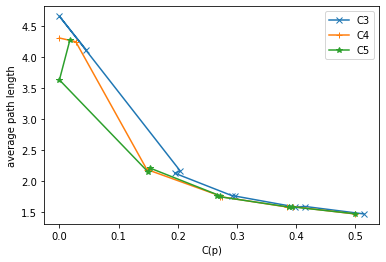

In [ ]:
plt.plot(final_clustering_coefficients[0], final_average_path_length[1], label="C3", marker='x')
plt.plot(final_clustering_coefficients[1], final_average_path_length[0], label="C4", marker='+')
plt.plot(final_clustering_coefficients[2], final_average_path_length[2], label="C5", marker='*')
plt.legend()
plt.xlabel('C(p)')
plt.ylabel('average path length')

# Degree Variance and Entropy

In [36]:
def calculate_degree_entropy(G):
    degree_sequence = sorted([d for n, d in G.degree()])  # degree sequence
    degrees = collections.Counter(degree_sequence)
    sum_degrees = sum(degrees.values())
    return (-1) * sum((degrees[k] * math.log(degrees[k]/sum_degrees)) for k in degrees) / sum_degrees

In [ ]:
ps = [x/10 for x in range(1,11)]
NUM_OF_NODES = 50
NUM_OF_GRAPHS = 100

ws_final_degree_variance = []
nws_final_degree_variance = []
ws_final_degree_entropy = []
nws_final_degree_entropy = []
for p in ps:
    ws_raw_degree_variance = []
    nws_raw_degree_variance = []
    ws_raw_degree_entropy = []
    nws_raw_degree_entropy = []
    for x in range(NUM_OF_GRAPHS):
        ws_G = create_small_world_ws_graph(NUM_OF_NODES, p)
        nws_G = create_small_world_nws_graph(NUM_OF_NODES, p)
        ws_raw_degree_variance.append(statistics.variance([x[1] for x in list(ws_G.degree())]))
        nws_raw_degree_variance.append(statistics.variance([x[1] for x in list(nws_G.degree())]))
        ws_raw_degree_entropy.append(calculate_degree_entropy(ws_G))
        nws_raw_degree_entropy.append(calculate_degree_entropy(nws_G))
    ws_final_degree_variance.append(statistics.mean(ws_raw_degree_variance))
    nws_final_degree_variance.append(statistics.mean(nws_raw_degree_variance))
    ws_final_degree_entropy.append(statistics.mean(ws_raw_degree_entropy))
    nws_final_degree_entropy.append(statistics.mean(nws_raw_degree_entropy))

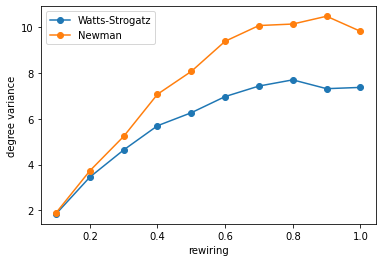

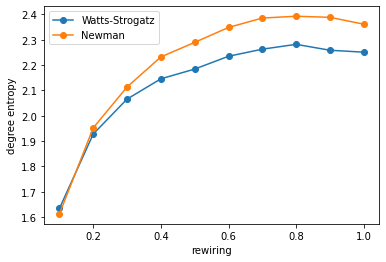

In [ ]:
plt.plot(ps, ws_final_degree_variance, label="Watts-Strogatz", marker='o')
plt.plot(ps, nws_final_degree_variance, label="Newman", marker='o')
plt.legend()
plt.xlabel('rewiring')
plt.ylabel('degree variance')
plt.show()

plt.plot(ps, ws_final_degree_entropy, label="Watts-Strogatz", marker='o')
plt.plot(ps, nws_final_degree_entropy, label="Newman", marker='o')
plt.legend()
plt.xlabel('rewiring')
plt.ylabel('degree entropy')
plt.show()

In [ ]:
ns = [x for x in range(50,1001, 50)]
NUM_OF_GRAPHS = 10

ws_final_degree_variance = []
nws_final_degree_variance = []
r_final_degree_variance = []
sf_final_degree_variance = []
ws_final_degree_entropy = []
nws_final_degree_entropy = []
r_final_degree_entropy = []
sf_final_degree_entropy = []

ws_final_cc = []
nws_final_cc = []
r_final_cc = []
sf_final_cc = []
# ws_final_t = []
# nws_final_t = []
# r_final_t = []
# sf_final_t = []
ws_final_h = []
nws_final_h = []
r_final_h = []
sf_final_h = []
for n in ns:
    print(n)
    ws_raw_degree_variance = []
    nws_raw_degree_variance = []
    r_raw_degree_variance = []
    sf_raw_degree_variance = []

    ws_raw_degree_entropy = []
    nws_raw_degree_entropy = []
    r_raw_degree_entropy = []
    sf_raw_degree_entropy = []

    ws_raw_cc = []
    nws_raw_cc = []
    r_raw_cc = []
    sf_raw_cc = []
    
    # ws_raw_t = []
    # nws_raw_t = []
    # r_raw_t = []
    # sf_raw_t = []

    ws_raw_h = []
    nws_raw_h = []
    r_raw_h = []
    sf_raw_h = []
    for x in range(NUM_OF_GRAPHS):
        ws_G = create_small_world_ws_graph(n)
        nws_G = create_small_world_nws_graph(n)
        r_G = create_random_graph(n)
        sf_G = create_scale_free_graph(n)

        ws_raw_degree_variance.append(statistics.variance([x[1] for x in list(ws_G.degree())]))
        nws_raw_degree_variance.append(statistics.variance([x[1] for x in list(nws_G.degree())]))
        r_raw_degree_variance.append(statistics.variance([x[1] for x in list(r_G.degree())]))
        sf_raw_degree_variance.append(statistics.variance([x[1] for x in list(sf_G.degree())]))
        
        ws_raw_degree_entropy.append(calculate_degree_entropy(ws_G))
        nws_raw_degree_entropy.append(calculate_degree_entropy(nws_G))
        r_raw_degree_entropy.append(calculate_degree_entropy(r_G))
        sf_raw_degree_entropy.append(calculate_degree_entropy(sf_G))

        ws_raw_cc.append(nx.average_clustering(ws_G))
        nws_raw_cc.append(nx.average_clustering(nws_G))
        r_raw_cc.append(nx.average_clustering(r_G))
        # sf_raw_cc.append(nx.average_clustering(sf_G))

        # sum_numerator, sum_denominator = calculate_Sq(ws_G, 3)
        # ws_raw_t.append(sum_numerator/(sum_denominator*2))
        # sum_numerator, sum_denominator = calculate_Sq(nws_G, 3)
        # nws_raw_t.append(sum_numerator/(sum_denominator*2))
        # sum_numerator, sum_denominator = calculate_Sq(r_G, 3)
        # r_raw_t.append(sum_numerator/(sum_denominator*2))
        # sum_numerator, sum_denominator = calculate_Sq(sf_G, 3)
        # sf_raw_t.append(sum_numerator/(sum_denominator*2))

        ws_raw_h.append(calculate_hamming_coeff(ws_G))
        nws_raw_h.append(calculate_hamming_coeff(nws_G))
        r_raw_h.append(calculate_hamming_coeff(r_G))
        sf_raw_h.append(calculate_hamming_coeff(sf_G))

    ws_final_degree_variance.append(statistics.mean(ws_raw_degree_variance))
    nws_final_degree_variance.append(statistics.mean(nws_raw_degree_variance))
    r_final_degree_variance.append(statistics.mean(r_raw_degree_variance))
    sf_final_degree_variance.append(statistics.mean(sf_raw_degree_variance))

    ws_final_degree_entropy.append(statistics.mean(ws_raw_degree_entropy))
    nws_final_degree_entropy.append(statistics.mean(nws_raw_degree_entropy))
    r_final_degree_entropy.append(statistics.mean(r_raw_degree_entropy))
    sf_final_degree_entropy.append(statistics.mean(sf_raw_degree_entropy))

    ws_final_cc.append(statistics.mean(ws_raw_cc))
    nws_final_cc.append(statistics.mean(nws_raw_cc))
    r_final_cc.append(statistics.mean(r_raw_cc))
    # sf_final_cc.append(statistics.mean(sf_raw_cc))

    # ws_final_t.append(statistics.mean(ws_raw_t))
    # nws_final_t.append(statistics.mean(nws_raw_t))
    # r_final_t.append(statistics.mean(r_raw_t))
    # sf_final_t.append(statistics.mean(sf_raw_t))

    ws_final_h.append(statistics.mean(ws_raw_h))
    nws_final_h.append(statistics.mean(nws_raw_h))
    r_final_h.append(statistics.mean(r_raw_h))
    sf_final_h.append(statistics.mean(sf_raw_h))

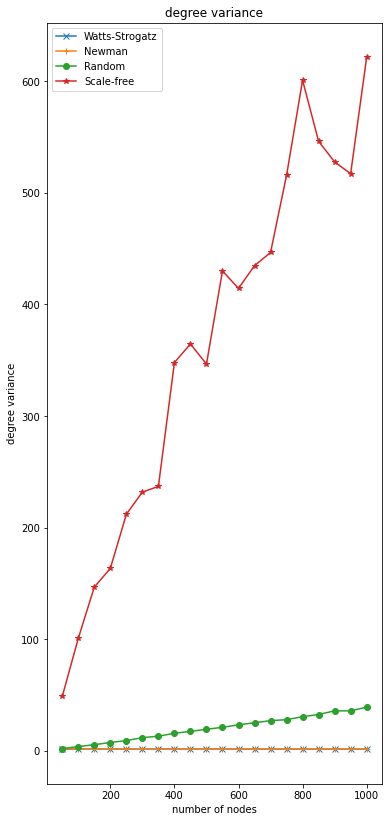

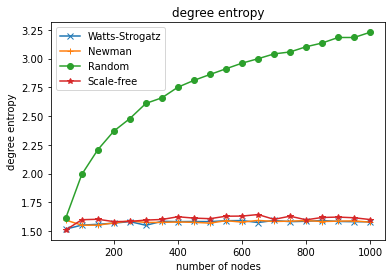

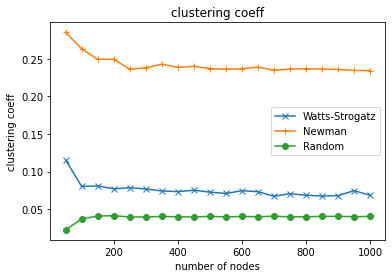

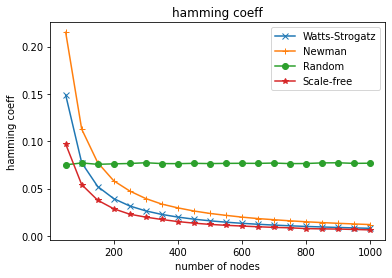

In [50]:
plt.figure(figsize=(6, 14))
plt.plot(ns, ws_final_degree_variance, label="Watts-Strogatz", marker='x')
plt.plot(ns, nws_final_degree_variance, label="Newman", marker='+')
plt.plot(ns, r_final_degree_variance, label="Random", marker='o')
plt.plot(ns, sf_final_degree_variance, label="Scale-free", marker='*')
plt.legend()
plt.xlabel('number of nodes')
plt.ylabel('degree variance')
plt.title('degree variance')
plt.show()

plt.plot(ns, ws_final_degree_entropy, label="Watts-Strogatz", marker='x')
plt.plot(ns, nws_final_degree_entropy, label="Newman", marker='+')
plt.plot(ns, r_final_degree_entropy, label="Random", marker='o')
plt.plot(ns, sf_final_degree_entropy, label="Scale-free", marker='*')
plt.legend()
plt.xlabel('number of nodes')
plt.ylabel('degree entropy')
plt.title('degree entropy')
plt.show()

plt.plot(ns, ws_final_cc, label="Watts-Strogatz", marker='x')
plt.plot(ns, nws_final_cc, label="Newman", marker='+')
plt.plot(ns, r_final_cc, label="Random", marker='o')
plt.legend()
plt.xlabel('number of nodes')
plt.ylabel('clustering coeff')
plt.title('clustering coeff')
plt.show()

plt.plot(ns, ws_final_h, label="Watts-Strogatz", marker='x')
plt.plot(ns, nws_final_h, label="Newman", marker='+')
plt.plot(ns, r_final_h, label="Random", marker='o')
plt.plot(ns, sf_final_h, label="Scale-free", marker='*')
plt.legend()
plt.xlabel('number of nodes')
plt.ylabel('hamming coeff')
plt.title('hamming coeff')
plt.show()

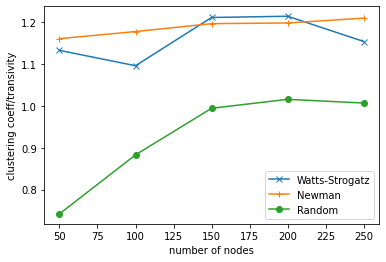

In [46]:
plt.plot(ns[:5], (np.array(ws_final_cc[:5])/np.array(ws_final_t[:5])).tolist(), label="Watts-Strogatz", marker='x')
plt.plot(ns[:5], (np.array(nws_final_cc[:5])/np.array(nws_final_t[:5])).tolist(), label="Newman", marker='+')
plt.plot(ns[:5], (np.array(r_final_cc[:5])/np.array(r_final_t[:5])).tolist(), label="Random", marker='o')
plt.legend()
plt.xlabel('number of nodes')
plt.ylabel('clustering coeff/transivity')
plt.show()

In [17]:
ll = [1,2,3]
l2 = []
ll += l2
ll

[1, 2, 3]

# Effect of cycle structures on networks

In [20]:
# Rn is the number of available paths from i_0 to i_n with distinct nodes
def get_cycle(n, adjacency_matrix, i_0):
    # indices = [range(len(adjacency_matrix)) for x in range(n-1)]
    # cycles = []
    sum = 0
    cycle_nodes = set([])
    if n == 3:
        for a in range(len(adjacency_matrix)):
            for b in range(a+1, len(adjacency_matrix)):
                if adjacency_matrix[i_0][a] and adjacency_matrix[a][b] and adjacency_matrix[b][i_0]:
                    sum += 1
                    cycle_nodes.add(i_0)
                    cycle_nodes.add(a)
                    cycle_nodes.add(b)
    elif n == 4:
        for a in range(len(adjacency_matrix)):
            for b in range(a+1, len(adjacency_matrix)):
                for c in range(b+1, len(adjacency_matrix)):
                    if adjacency_matrix[i_0][a] and adjacency_matrix[a][b] and adjacency_matrix[b][c] and adjacency_matrix[c][i_0]:
                        sum += 1
                        cycle_nodes.add(i_0)
                        cycle_nodes.add(a)
                        cycle_nodes.add(b)
                        cycle_nodes.add(c)
    elif n == 5:
        for a in range(len(adjacency_matrix)):
            for b in range(a+1, len(adjacency_matrix)):
                for c in range(b+1, len(adjacency_matrix)):
                    for d in range(c+1, len(adjacency_matrix)):
                        if adjacency_matrix[i_0][a] and adjacency_matrix[a][b] and adjacency_matrix[b][c] and adjacency_matrix[c][d] and adjacency_matrix[d][i_0]:
                            sum += 1
                            cycle_nodes.add(i_0)
                            cycle_nodes.add(a)
                            cycle_nodes.add(b)
                            cycle_nodes.add(c)
                            cycle_nodes.add(d)
    elif n == 6:
        for a in range(len(adjacency_matrix)):
            for b in range(a+1, len(adjacency_matrix)):
                for c in range(b+1, len(adjacency_matrix)):
                    for d in range(c+1, len(adjacency_matrix)):
                        for e in range(d+1, len(adjacency_matrix)):
                            if adjacency_matrix[i_0][a] and adjacency_matrix[a][b] and adjacency_matrix[b][c] and adjacency_matrix[c][d] and adjacency_matrix[d][e] and adjacency_matrix[e][i_0]:
                                sum += 1
                                cycle_nodes.add(i_0)
                                cycle_nodes.add(a)
                                cycle_nodes.add(b)
                                cycle_nodes.add(c)
                                cycle_nodes.add(d)
                                cycle_nodes.add(e)
    # for index in product(*indices):
    #     l_index = list(index)
    #     first_half = [i_0] + l_index
    #     if len(set(first_half)) != len(first_half):
    #         continue
    #     i = [i_0] + l_index + [i_n]
    #     for k in range(n):
    #         if adjacency_matrix[i[k]][i[k+1]] == 0:
    #             break
    #     else:
    #         # sum += 1
    #         cycles.append(first_half)
    return cycle_nodes, sum

In [21]:
def calculate_cycles(G, cycle_len):
    adjacency_matrix = nx.adjacency_matrix(G).toarray()
    all_cycles_num = 0
    all_cycle_nodes = set([])
    for i in range(len(adjacency_matrix)):
        cycle_nodes, cycles_num = get_cycle(cycle_len, adjacency_matrix, i)
        all_cycle_nodes.update(cycle_nodes)
        all_cycles_num += cycles_num
    # return sum_numerator/cycle_len
    return all_cycle_nodes, all_cycles_num

In [116]:
ns = [3,4,5,6]
ps = [x/10 for x in range(1,11)]
NUM_OF_NODES = 50
NUM_OF_GRAPHS = 20
final_clustering_coefficients = []
graphs = []
cycles_num = []
cycles_nodes = []

for i in range(len(ps)):
    graphs.append([])
    for j in range(NUM_OF_GRAPHS):
        G = create_small_world_ws_graph(NUM_OF_NODES, p)
        graphs[i].append(G)

for n in ns:
    print('n:', n)
    mean_clustering_coefficients = []
    cycles_num.append([])
    cycles_nodes.append([])
    for i, p in enumerate(ps):
        print('\tp:', p)
        cycles_num[n-3].append([])
        cycles_nodes[n-3].append([])
        raw_clustering_coefficients = []
        for j, G in enumerate(graphs[i]):
            nodes, num = calculate_cycles(G, n)
            cycles_num[n-3][i].append(num)
            cycles_nodes[n-3][i].append(nodes)
            # raw_clustering_coefficients.append()
        # mean_clustering_coefficients.append(statistics.mean(raw_clustering_coefficients))
    # final_clustering_coefficients.append(mean_clustering_coefficients)

n: 3
	p: 0.1


C:\Users\WebVajhegan\AppData\Local\Temp\ipykernel_17600\992921167.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjacency_matrix = nx.adjacency_matrix(G).toarray()


	p: 0.2
	p: 0.3
	p: 0.4
	p: 0.5
	p: 0.6
	p: 0.7
	p: 0.8
	p: 0.9
	p: 1.0
n: 4
	p: 0.1
	p: 0.2
	p: 0.3
	p: 0.4
	p: 0.5
	p: 0.6
	p: 0.7
	p: 0.8
	p: 0.9
	p: 1.0
n: 5
	p: 0.1
	p: 0.2
	p: 0.3
	p: 0.4
	p: 0.5
	p: 0.6
	p: 0.7
	p: 0.8
	p: 0.9
	p: 1.0
n: 6
	p: 0.1
	p: 0.2
	p: 0.3
	p: 0.4
	p: 0.5
	p: 0.6
	p: 0.7
	p: 0.8
	p: 0.9
	p: 1.0


# Zipf diagram

[20.1, 128.35, 26.35, 14.75]


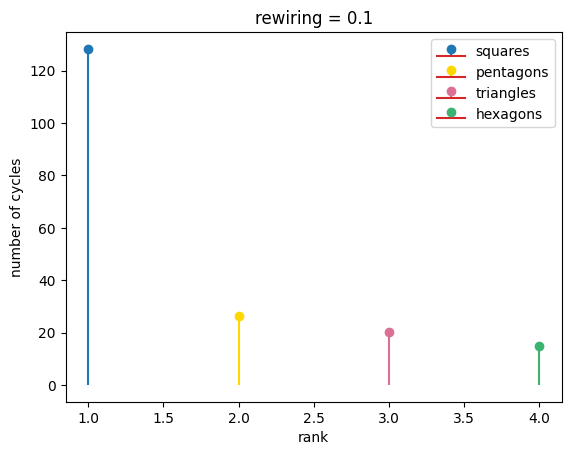


[22.8, 132.6, 27.5, 15.85]


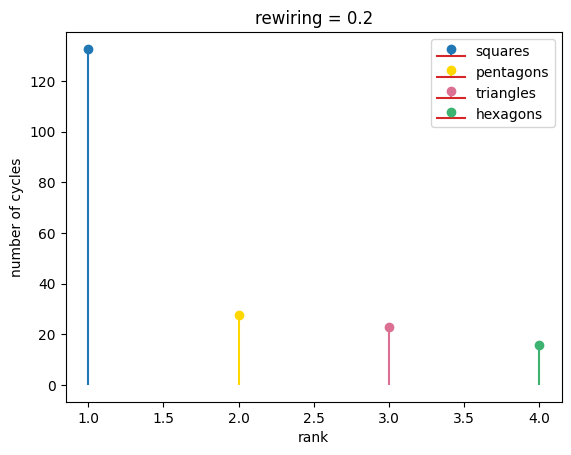


[22.65, 136.9, 29.35, 16.8]


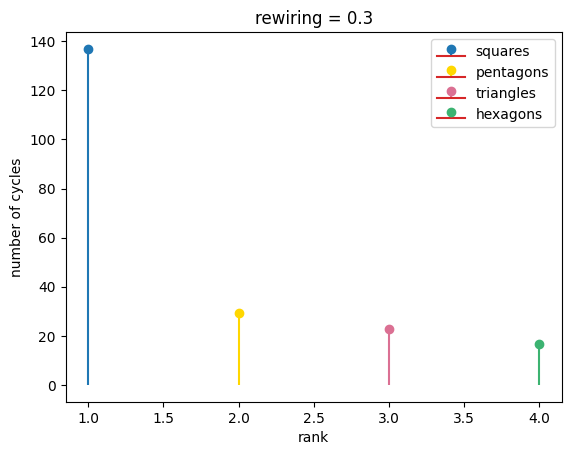


[21.15, 139.45, 28.5, 17.55]


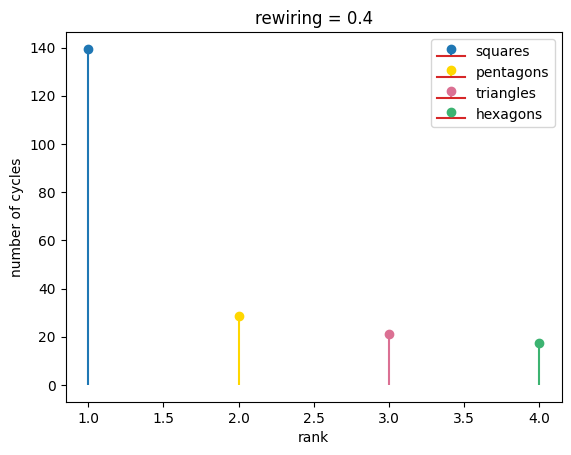


[22.05, 133.8, 27.6, 17.55]


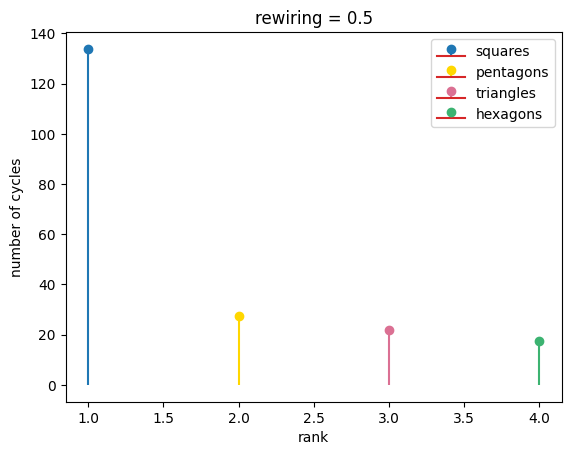


[21, 134.9, 29.2, 13.1]


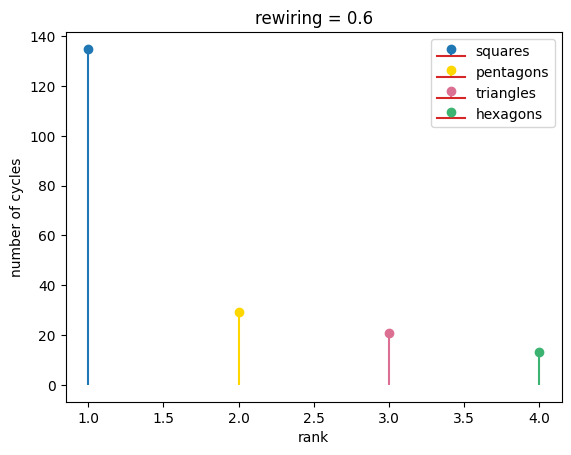


[21.9, 131.95, 25.55, 14.8]


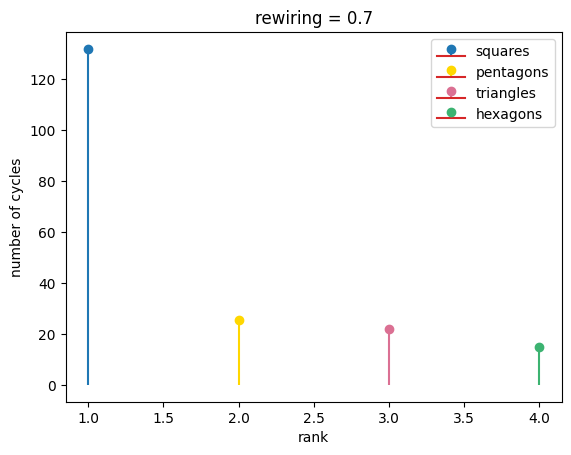


[21.3, 133.65, 26.8, 11.1]


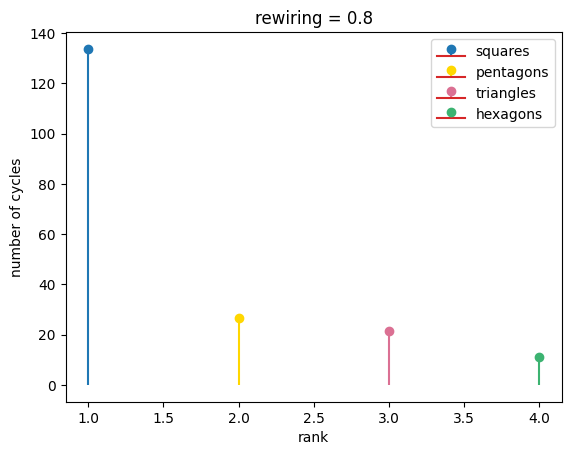


[21.3, 134.2, 28, 16.25]


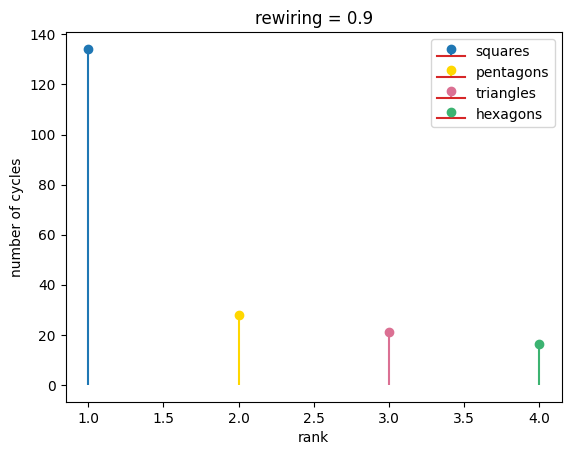


[21, 135.5, 24.3, 14.3]


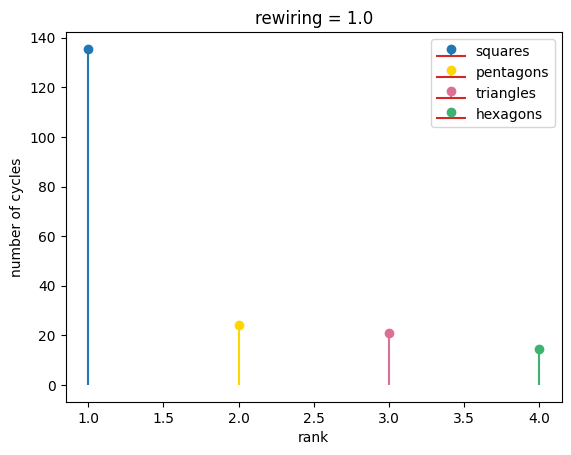

In [117]:
for i in range(len(ps)):
    plot_cycles = [statistics.mean(cycles_num[x][i]) for x in range(4)]
    print(plot_cycles)
    cycles_zip = zip(plot_cycles, ['triangles', 'squares', 'pentagons', 'hexagons'])
    sorted_cycles = sorted(cycles_zip, reverse=True)
    plt.stem([1], sorted_cycles[0][0], label=sorted_cycles[0][1])
    plt.stem([2], sorted_cycles[1][0], label=sorted_cycles[1][1], linefmt='gold', markerfmt=('gold', 'o'))
    plt.stem([3], sorted_cycles[2][0], label=sorted_cycles[2][1], linefmt='palevioletred', markerfmt=('palevioletred', 'o'))
    plt.stem([4], sorted_cycles[3][0], label=sorted_cycles[3][1], linefmt='mediumseagreen', markerfmt=('mediumseagreen', 'o'))
    plt.legend()
    plt.xlabel('rank')
    plt.ylabel('number of cycles')
    plt.title(f'rewiring = {ps[i]}')
    plt.show()
    print()

# Effect of rewiring coeff on cycle structures

Text(0, 0.5, 'number of cycles')

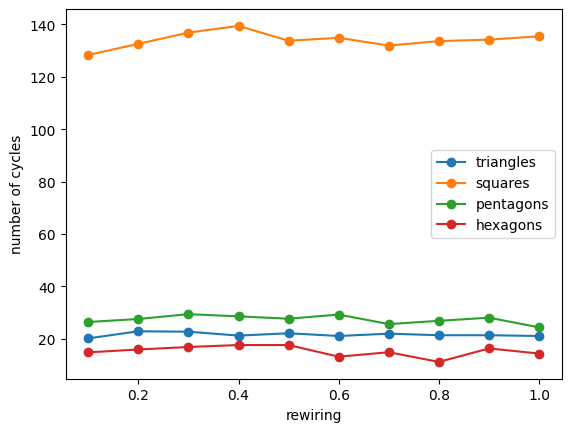

In [118]:
plot_cycles = [[statistics.mean(cycles_num[i][x]) for x in range(len(ps))] for i in range(4)]
plt.plot(ps, plot_cycles[0], label="triangles", marker='o')
plt.plot(ps, plot_cycles[1], label="squares", marker='o')
plt.plot(ps, plot_cycles[2], label="pentagons", marker='o')
plt.plot(ps, plot_cycles[3], label="hexagons", marker='o')
plt.legend()
plt.xlabel('rewiring')
plt.ylabel('number of cycles')

# F(x)

In [119]:
def get_graph_entropy(G):
    A = nx.adjacency_matrix(G)
    erdos = nx.from_numpy_matrix(A.todense())
    q_E = 0
    edges = list(erdos.edges())
    for i in range(len(edges)):
        d1 = erdos.degree(edges[i][0])
        d2 = erdos.degree(edges[i][1])
        q_E = q_E + (1/d1) + (1/d2) - (2/ math.sqrt(d1*d2))
    #print("q_E",q_E)
    Q_E_3 = q_E / (n - 2 * math.sqrt(n-1))
    # Quantum_Entropy.append(Q_E_3)
    return Q_E_3

def get_graph_energy(G):
    A = nx.adjacency_matrix(G)
    erdos = nx.from_numpy_matrix(A.todense())

    n = nx.number_of_nodes(erdos)
    m = nx.number_of_edges(erdos)
    eig_matrix = np.abs(nx.adjacency_spectrum(erdos))

    #################### Energy #############################
    E_G = np.sum(np.abs(nx.adjacency_spectrum(erdos)))
    #print("Energy: ",E_G)

    # Energy_laplacian
    ba = erdos.copy()
    n = ba.number_of_nodes()
    m = ba.number_of_edges() * 2
    eig_lap = nx.laplacian_spectrum(ba)
    E_G_L = np.sum(np.abs(eig_lap - m/float(n)))
    #print("Energy laplacian: ",E_G_L)

    # Energy_index_safaei
    E = abs(E_G - E_G_L)
    Energy = E / max(E_G,E_G_L)
    return Energy

In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import math


for Read in range(0,1): #&& count
    #erdos = nx.read_edgelist( "F:\DR.safayi\Consis\Graph_Merge_%s.csv"%(str(Read+1)), data=False)
    #erdos = nx.read_edgelist( "F:\DR.safayi\Merge2\Graph_%s.csv"%(str(Read+1)), data=False)
    G = nx.read_edgelist("C:\\Users\\Mahdi Emadi\\Desktop\\Ali\\Code\\merged_graph_1.csv")
    A = nx.adjacency_matrix(G)
    erdos = nx.from_numpy_matrix(A.todense())

    n = nx.number_of_nodes(erdos)
    m = nx.number_of_edges(erdos)
    eig_matrix = np.abs(nx.adjacency_spectrum(erdos))

    #################### Energy #############################
    E_G = np.sum(np.abs(nx.adjacency_spectrum(erdos)))
    #print("Energy: ",E_G)

    # Energy_laplacian
    ba = erdos.copy()
    n = ba.number_of_nodes()
    m = ba.number_of_edges() * 2
    eig_lap = nx.laplacian_spectrum(ba)
    E_G_L = np.sum(np.abs(eig_lap - m/float(n)))
    #print("Energy laplacian: ",E_G_L)

    # Energy_index_safaei
    E = abs(E_G - E_G_L)
    Energy = E / max(E_G,E_G_L)
    #print("Energy_index_safaei: ",Energy_index)
    Energy_index.append(Energy)


    ################ Quantum_Entropy ###########################
    q_E = 0
    edges = list(erdos.edges())
    for i in range(len(edges)):
        d1 = erdos.degree(edges[i][0])
        d2 = erdos.degree(edges[i][1])
        q_E = q_E + (1/d1) + (1/d2) - (2/ math.sqrt(d1*d2))
    #print("q_E",q_E)
    Q_E_3 = q_E / (n - 2 * math.sqrt(n-1))
    Quantum_Entropy.append(Q_E_3)


file = open('List.csv', 'w+', newline ='')
with file:
    write = csv.writer(file)
    write.writerows(map(lambda x: [x], Energy_index))
    write.writerows(map(lambda x: [x], Quantum_Entropy))
    file.close()


In [121]:
original_graphs = graphs[4]
original_cycles = [cycles_nodes[i][4] for i in range(4)]
entropies = []
energies = []
for i in range(len(ns)):
    entropies.append([])
    energies.append([])
    for j in range(NUM_OF_GRAPHS):
        entropies[i].append([])
        energies[i].append([])
        cur_graph = original_graphs[j].copy()
        cur_nodes = list(original_cycles[i][j].copy())
        degrees = list(cur_graph.degree(cur_nodes))
        nodes_zip = zip(degrees, cur_nodes)
        sorted_nodes = [x for _,x in sorted(nodes_zip, reverse=True)]
        entropies[i][j].append(get_graph_entropy(cur_graph))
        energies[i][j].append(get_graph_energy(cur_graph))
        for k in range(len(sorted_nodes)):
            cur_graph.remove_node(sorted_nodes[k])
            if nx.is_empty(cur_graph):
                break
            entropies[i][j].append(get_graph_entropy(cur_graph))
            energies[i][j].append(get_graph_energy(cur_graph))

C:\Users\WebVajhegan\AppData\Local\Temp\ipykernel_17600\2184551070.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)
C:\Users\WebVajhegan\AppData\Local\Temp\ipykernel_17600\2184551070.py:16: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)


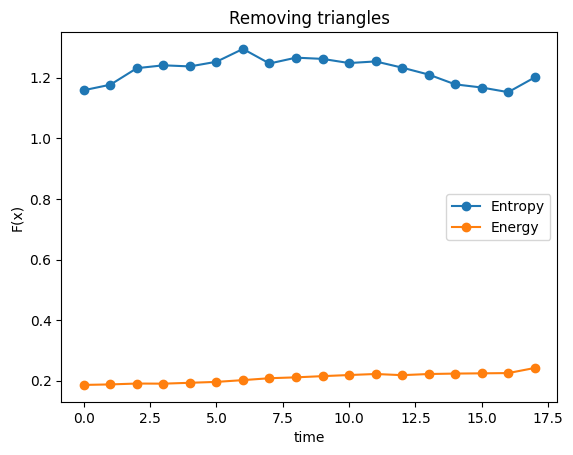

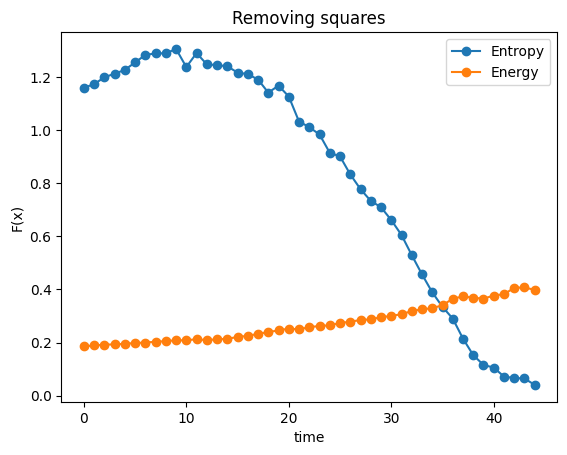

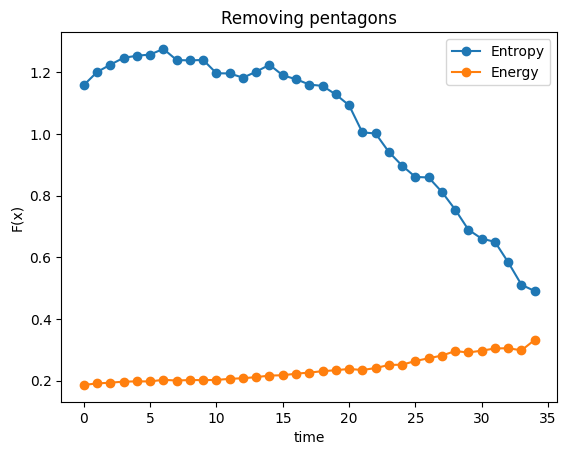

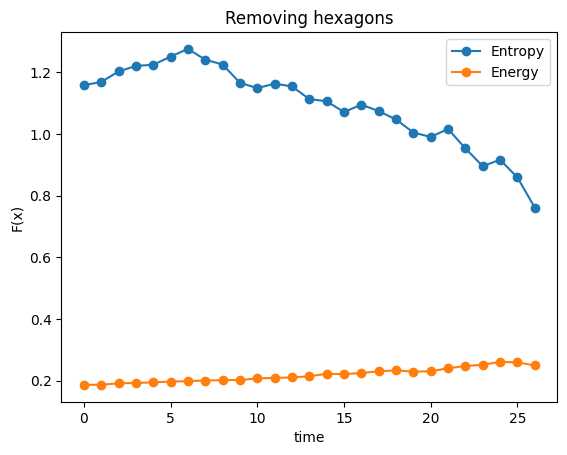

In [144]:
all_ents = [[x for x in entropies[0][j]] for j in range(NUM_OF_GRAPHS)]
max_row_len=max([len(ll) for ll in all_ents])
avg_ents=np.nanmean([[el for el in row ] + [np.NaN] * max(0, max_row_len-len(row))  for row in all_ents], axis=0)
all_enrs = [[x for x in energies[0][j]] for j in range(NUM_OF_GRAPHS)]
max_row_len=max([len(ll) for ll in all_enrs])
avg_enrs=np.nanmean([[el for el in row ] + [np.NaN] * max(0, max_row_len-len(row))  for row in all_enrs], axis=0)
len1 = int(statistics.mean([len(i) for i in all_ents]))
len2 = int(statistics.mean([len(i) for i in all_enrs]))
plt.plot([x for x in range(len(avg_ents))][:len1], avg_ents[:len1], label="Entropy", marker='o')
plt.plot([x for x in range(len(avg_enrs))][:len2], avg_enrs[:len2], label="Energy", marker='o')
plt.legend()
plt.title('Removing triangles')
plt.xlabel('time')
plt.ylabel('F(x)')
plt.show()

all_ents = [[x for x in entropies[1][j]] for j in range(NUM_OF_GRAPHS)]
max_row_len=max([len(ll) for ll in all_ents])
avg_ents=np.nanmean([[el for el in row ] + [np.NaN] * max(0, max_row_len-len(row))  for row in all_ents], axis=0)
all_enrs = [[x for x in energies[1][j]] for j in range(NUM_OF_GRAPHS)]
max_row_len=max([len(ll) for ll in all_enrs])
avg_enrs=np.nanmean([[el for el in row ] + [np.NaN] * max(0, max_row_len-len(row))  for row in all_enrs], axis=0)
len1 = int(statistics.mean([len(i) for i in all_ents]))
len2 = int(statistics.mean([len(i) for i in all_enrs]))
plt.plot([x for x in range(len(avg_ents))][:len1], avg_ents[:len1], label="Entropy", marker='o')
plt.plot([x for x in range(len(avg_enrs))][:len2], avg_enrs[:len2], label="Energy", marker='o')
plt.legend()
plt.title('Removing squares')
plt.xlabel('time')
plt.ylabel('F(x)')
plt.show()

all_ents = [[x for x in entropies[2][j]] for j in range(NUM_OF_GRAPHS)]
max_row_len=max([len(ll) for ll in all_ents])
avg_ents=np.nanmean([[el for el in row ] + [np.NaN] * max(0, max_row_len-len(row))  for row in all_ents], axis=0)
all_enrs = [[x for x in energies[2][j]] for j in range(NUM_OF_GRAPHS)]
max_row_len=max([len(ll) for ll in all_enrs])
avg_enrs=np.nanmean([[el for el in row ] + [np.NaN] * max(0, max_row_len-len(row))  for row in all_enrs], axis=0)
len1 = int(statistics.mean([len(i) for i in all_ents]))
len2 = int(statistics.mean([len(i) for i in all_enrs]))
plt.plot([x for x in range(len(avg_ents))][:len1], avg_ents[:len1], label="Entropy", marker='o')
plt.plot([x for x in range(len(avg_enrs))][:len2], avg_enrs[:len2], label="Energy", marker='o')
plt.legend()
plt.title('Removing pentagons')
plt.xlabel('time')
plt.ylabel('F(x)')
plt.show()

all_ents = [[x for x in entropies[3][j]] for j in range(NUM_OF_GRAPHS)]
max_row_len=max([len(ll) for ll in all_ents])
avg_ents=np.nanmean([[el for el in row ] + [np.NaN] * max(0, max_row_len-len(row))  for row in all_ents], axis=0)
all_enrs = [[x for x in energies[3][j]] for j in range(NUM_OF_GRAPHS)]
max_row_len=max([len(ll) for ll in all_enrs])
avg_enrs=np.nanmean([[el for el in row ] + [np.NaN] * max(0, max_row_len-len(row))  for row in all_enrs], axis=0)
len1 = int(statistics.mean([len(i) for i in all_ents]))
len2 = int(statistics.mean([len(i) for i in all_enrs]))
plt.plot([x for x in range(len(avg_ents))][:len1], avg_ents[:len1], label="Entropy", marker='o')
plt.plot([x for x in range(len(avg_enrs))][:len2], avg_enrs[:len2], label="Energy", marker='o')
plt.legend()
plt.title('Removing hexagons')
plt.xlabel('time')
plt.ylabel('F(x)')
plt.show()


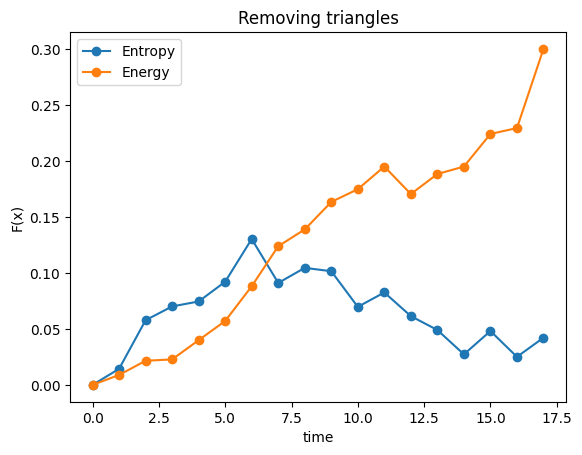

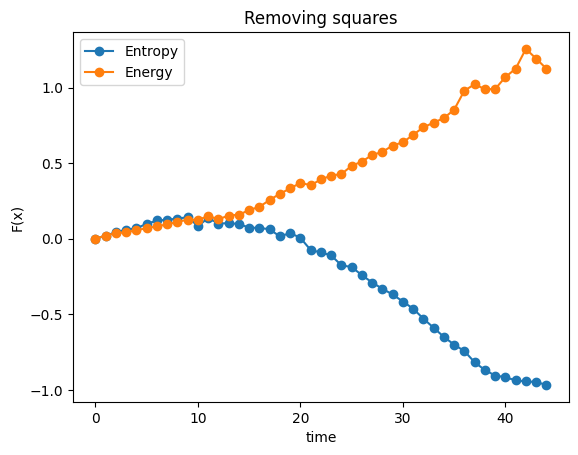

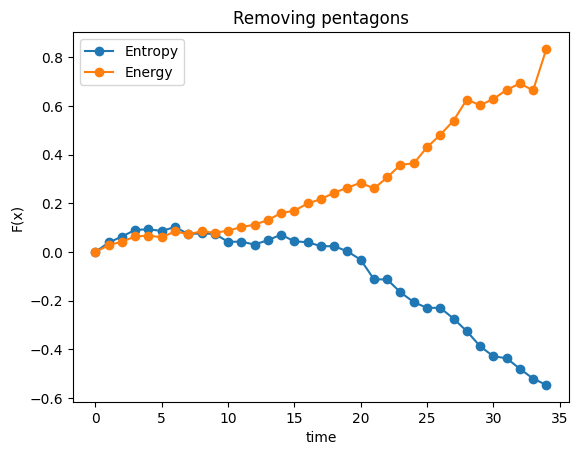

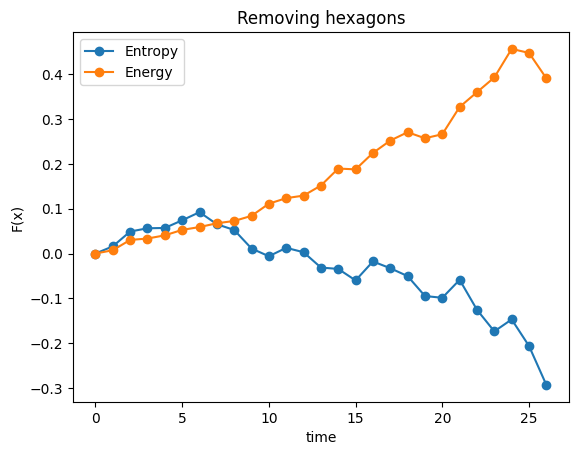

In [145]:
# vertical: (fx0 -fx) / fx0
n = 0
all_ents = [[(x - entropies[n][j][0])/entropies[n][j][0] for x in entropies[n][j]] for j in range(NUM_OF_GRAPHS)]
max_row_len=max([len(ll) for ll in all_ents])
avg_ents=np.nanmean([[el for el in row ] + [np.NaN] * max(0, max_row_len-len(row))  for row in all_ents], axis=0)
all_enrs = [[(x - energies[n][j][0])/energies[n][j][0] for x in energies[n][j]] for j in range(NUM_OF_GRAPHS)]
max_row_len=max([len(ll) for ll in all_enrs])
avg_enrs=np.nanmean([[el for el in row ] + [np.NaN] * max(0, max_row_len-len(row))  for row in all_enrs], axis=0)
len1 = int(statistics.mean([len(i) for i in all_ents]))
len2 = int(statistics.mean([len(i) for i in all_enrs]))
plt.plot([x for x in range(len(avg_ents))][:len1], avg_ents[:len1], label="Entropy", marker='o')
plt.plot([x for x in range(len(avg_enrs))][:len2], avg_enrs[:len2], label="Energy", marker='o')
plt.legend()
plt.title('Removing triangles')
plt.xlabel('time')
plt.ylabel('F(x)')
plt.show()

n = 1
all_ents = [[(x - entropies[n][j][0])/entropies[n][j][0] for x in entropies[n][j]] for j in range(NUM_OF_GRAPHS)]
max_row_len=max([len(ll) for ll in all_ents])
avg_ents=np.nanmean([[el for el in row ] + [np.NaN] * max(0, max_row_len-len(row))  for row in all_ents], axis=0)
all_enrs = [[(x - energies[n][j][0])/energies[n][j][0] for x in energies[n][j]] for j in range(NUM_OF_GRAPHS)]
max_row_len=max([len(ll) for ll in all_enrs])
avg_enrs=np.nanmean([[el for el in row ] + [np.NaN] * max(0, max_row_len-len(row))  for row in all_enrs], axis=0)
len1 = int(statistics.mean([len(i) for i in all_ents]))
len2 = int(statistics.mean([len(i) for i in all_enrs]))
plt.plot([x for x in range(len(avg_ents))][:len1], avg_ents[:len1], label="Entropy", marker='o')
plt.plot([x for x in range(len(avg_enrs))][:len2], avg_enrs[:len2], label="Energy", marker='o')
plt.legend()
plt.title('Removing squares')
plt.xlabel('time')
plt.ylabel('F(x)')
plt.show()

n = 2
all_ents = [[(x - entropies[n][j][0])/entropies[n][j][0] for x in entropies[n][j]] for j in range(NUM_OF_GRAPHS)]
max_row_len=max([len(ll) for ll in all_ents])
avg_ents=np.nanmean([[el for el in row ] + [np.NaN] * max(0, max_row_len-len(row))  for row in all_ents], axis=0)
all_enrs = [[(x - energies[n][j][0])/energies[n][j][0] for x in energies[n][j]] for j in range(NUM_OF_GRAPHS)]
max_row_len=max([len(ll) for ll in all_enrs])
avg_enrs=np.nanmean([[el for el in row ] + [np.NaN] * max(0, max_row_len-len(row))  for row in all_enrs], axis=0)
len1 = int(statistics.mean([len(i) for i in all_ents]))
len2 = int(statistics.mean([len(i) for i in all_enrs]))
plt.plot([x for x in range(len(avg_ents))][:len1], avg_ents[:len1], label="Entropy", marker='o')
plt.plot([x for x in range(len(avg_enrs))][:len2], avg_enrs[:len2], label="Energy", marker='o')
plt.legend()
plt.title('Removing pentagons')
plt.xlabel('time')
plt.ylabel('F(x)')
plt.show()

n = 3
all_ents = [[(x - entropies[n][j][0])/entropies[n][j][0] for x in entropies[n][j]] for j in range(NUM_OF_GRAPHS)]
max_row_len=max([len(ll) for ll in all_ents])
avg_ents=np.nanmean([[el for el in row ] + [np.NaN] * max(0, max_row_len-len(row))  for row in all_ents], axis=0)
all_enrs = [[(x - energies[n][j][0])/energies[n][j][0] for x in energies[n][j]] for j in range(NUM_OF_GRAPHS)]
max_row_len=max([len(ll) for ll in all_enrs])
avg_enrs=np.nanmean([[el for el in row ] + [np.NaN] * max(0, max_row_len-len(row))  for row in all_enrs], axis=0)
len1 = int(statistics.mean([len(i) for i in all_ents]))
len2 = int(statistics.mean([len(i) for i in all_enrs]))
plt.plot([x for x in range(len(avg_ents))][:len1], avg_ents[:len1], label="Entropy", marker='o')
plt.plot([x for x in range(len(avg_enrs))][:len2], avg_enrs[:len2], label="Energy", marker='o')
plt.legend()
plt.title('Removing hexagons')
plt.xlabel('time')
plt.ylabel('F(x)')
plt.show()


# Some Considerations on Six Degrees of Separation from A Theoretical Point of View

In [1]:
def calculate_Cp(G, p, K):
    cp = (3*K-6)/(4*K-2)*((1-p)**3)
    return cp

def calculate_Fx(x):
    fx = 1/(2*math.sqrt((x**2)+(2*x)))*numpy.arctanh(math.sqrt(x/(x+2)))
    return fx

def calculate_Lp(G, p, K):
    n = G.number_of_nodes()
    lp = 2*n/K*calculate_Fx(n*K*p/2)

In [2]:
def calculate_R(N, K, l):
    return N/(K**l)

In [12]:
NUM_OF_GRAPHS = 50
p = 0.5
Ks = [x for x in range(2,90)]
Cps = []
for K in Ks:
    Cp_sum = 0
    for j in range(NUM_OF_GRAPHS):
        G = create_small_world_ws_graph(100,p,K)
        Cp_sum += calculate_Cp(G, p, K)
    Cps.append(Cp_sum/NUM_OF_GRAPHS)

Text(0, 0.5, 'K')

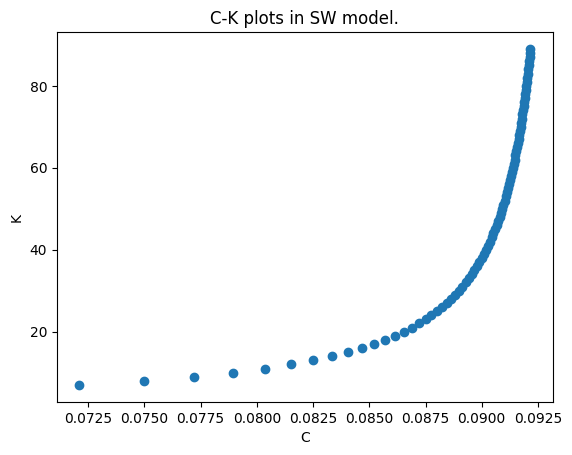

In [14]:
plt.scatter(Cps[5:], Ks[5:])
plt.title('C-K plots in SW model.')
plt.xlabel('C')
plt.ylabel('K')

# Agave network

In [52]:
def heterogeneity_index(G, my_alpha=-0.5):
    shortest_paths = dict(nx.shortest_path_length(G))
    s = [sum(shortest_paths[x].values()) for x in shortest_paths]
    sum1 = 0
    for i in range(G.number_of_nodes()):
        sum2 = 0
        for j in [x[1] for x in list(G.edges(i))]:
            sum2 += (s[i]*s[j])**(my_alpha)
        if s[i] != 0:
            sum1 += (G.degree[i]/s[i]) - (2*sum2)
    return sum1

def agave_heterogeneity_index(G):
    n = G.number_of_nodes()
    phi = (3*n-5) / (n-1) - 2 * math.sqrt((2-2/(n-1)))
    return phi

def phi_rel(G):
    return 100 * heterogeneity_index(G) / agave_heterogeneity_index(G)

In [65]:
graphs = ['Watts-Strogats', 'Agave', 'Newman', 'Regular', 'Random', 'Scale-Free']

phis = []
rel_phis = []
G = create_small_world_ws_graph()
phis.append(abs(heterogeneity_index(G)))
rel_phis.append(abs(phi_rel(G)))
G = create_agave_graph()
phis.append(abs(heterogeneity_index(G)))
rel_phis.append(abs(phi_rel(G)))
G = create_small_world_nws_graph()
phis.append(abs(heterogeneity_index(G)))
rel_phis.append(abs(phi_rel(G)))
G = create_small_world_ring_graph()
phis.append(abs(heterogeneity_index(G)))
rel_phis.append(abs(phi_rel(G)))
G = create_random_graph()
phis.append(abs(heterogeneity_index(G)))
rel_phis.append(abs(phi_rel(G)))
G = create_scale_free_graph()
rel_phis.append(abs(phi_rel(G)))
phis.append(abs(heterogeneity_index(G)))

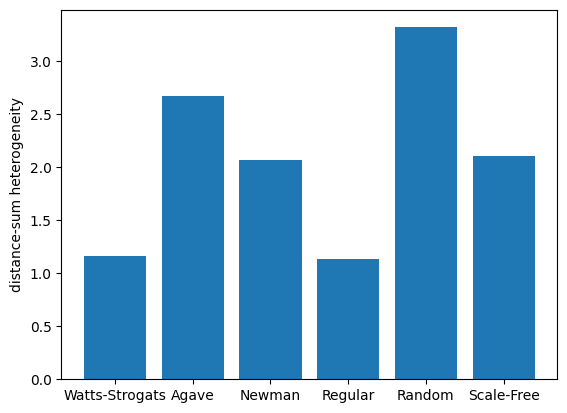

Text(0, 0.5, 'Relative distance-sum heterogeneity')

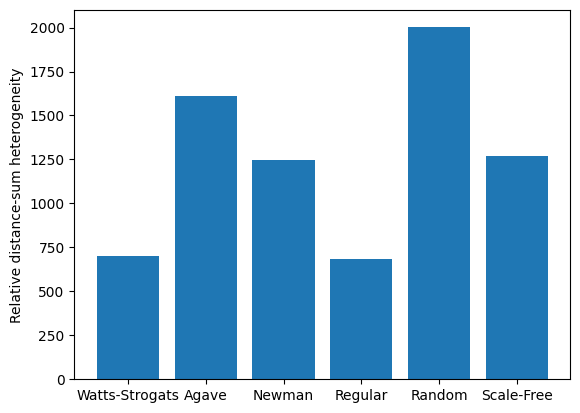

In [66]:
plt.bar(graphs, phis)
plt.ylabel('distance-sum heterogeneity')
plt.show()
plt.bar(graphs, rel_phis)
plt.ylabel('Relative distance-sum heterogeneity')

In [57]:
print(G.degree[2])

12
